In [1]:
import pandas
from scipy.io import arff
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from dl85 import DL85Predictor
from dl85 import DL85Classifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import utils
import graphviz
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
import ast

In [2]:
FILE_NAME = "HR"

# src: https://www.kaggle.com/hjmjerry/gender-discrimination
df = pandas.read_csv("../dataset_perso/HRDataset_v14.csv")
del df['Employee_Name']
del df['EmpID']
df

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,0,0,1,1,5,4,0,62506,0,19,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,1,1,1,5,3,3,0,104437,1,27,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,1,1,0,5,5,3,0,64955,1,20,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,1,1,0,1,5,3,0,64991,0,19,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,0,2,0,5,5,3,0,50825,1,19,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,1,1,5,3,0,65893,0,20,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,0,0,0,5,5,1,0,48513,1,19,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,0,0,0,1,3,4,0,220450,0,6,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,0,0,0,1,3,3,0,89292,0,9,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [3]:
salary_mean = np.mean(np.array(df["Salary"].tolist(), float))
print(f"Mean: {salary_mean}")
for i in range(0,len(df)):
    if df.at[i, "Salary"] >= salary_mean:
        df.at[i, "Salary_mean"] = 1
    else:
        df.at[i, "Salary_mean"] = 0
del df["Salary"]

for i in range(0,len(df)):
    df.at[i, "Absences"] = df.at[i, "Absences"] / 5
for i in range(0,len(df)):
    df.at[i, "EngagementSurvey"] = int(df.at[i, "EngagementSurvey"])
for i in range(0,len(df)):
    if df.at[i, "HispanicLatino"] == 'Yes' or df.at[i, "HispanicLatino"] == 'yes' :
        df.at[i, "HispanicLatino"] = 1
    elif df.at[i, "HispanicLatino"] == 'No' or df.at[i, "HispanicLatino"] == 'no' :
        df.at[i, "HispanicLatino"] = 0

df

Mean: 69020.6848874598


,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,PositionID,Position,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Salary_mean
0,0,0,1,1,5,4,0,0,19,Production Technician I,...,22.0,LinkedIn,Exceeds,4.0,5,0,1/17/2019,0,0.2,0.0
1,1,1,1,5,3,3,0,1,27,Sr. DBA,...,4.0,Indeed,Fully Meets,4.0,3,6,2/24/2016,0,3.4,1.0
2,1,1,0,5,5,3,0,1,20,Production Technician II,...,20.0,LinkedIn,Fully Meets,3.0,3,0,5/15/2012,0,0.6,0.0
3,1,1,0,1,5,3,0,0,19,Production Technician I,...,16.0,Indeed,Fully Meets,4.0,5,0,1/3/2019,0,3.0,0.0
4,0,2,0,5,5,3,0,1,19,Production Technician I,...,39.0,Google Search,Fully Meets,5.0,4,0,2/1/2016,0,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,1,1,5,3,0,0,20,Production Technician II,...,20.0,LinkedIn,Fully Meets,4.0,4,0,2/28/2019,0,2.6,0.0
307,0,0,0,5,5,1,0,1,19,Production Technician I,...,12.0,Google Search,PIP,3.0,2,0,9/2/2015,5,0.8,0.0
308,0,0,0,1,3,4,0,0,6,CIO,...,2.0,Employee Referral,Exceeds,4.0,5,6,2/21/2019,0,3.2,1.0
309,0,0,0,1,3,3,0,0,9,Data Analyst,...,4.0,Employee Referral,Fully Meets,5.0,3,5,2/1/2019,0,2.2,1.0


In [4]:
col = ['EmpStatusID', 'PerfScoreID', 'Position', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'Department', 'PerformanceScore', 'EmpSatisfaction', 'Absences']
df = df.drop(['MarriedID', 'MaritalStatusID', 'Zip', 'DOB', 'Sex', 'DateofHire','DateofTermination', 'TermReason', 'EmploymentStatus', 'ManagerName', 'ManagerID', 'EngagementSurvey', 'LastPerformanceReview_Date', 'DaysLateLast30', 'RecruitmentSource', 'State', 'DeptID', 'PositionID', 'SpecialProjectsCount'], axis=1)
df = pd.get_dummies(df, columns=col)
for col in df:
    if len(df[col].unique()) > 2:
        print(f'{col}: {df[col].unique()}')
df

,GenderID,FromDiversityJobFairID,Termd,HispanicLatino,Salary_mean,EmpStatusID_1,EmpStatusID_2,EmpStatusID_3,EmpStatusID_4,EmpStatusID_5,...,Absences_2.2,Absences_2.4,Absences_2.6,Absences_2.8,Absences_3.0,Absences_3.2,Absences_3.4,Absences_3.6,Absences_3.8,Absences_4.0
0,1,0,0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,0,0,0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
307,0,0,1,0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
308,0,0,0,0,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
309,0,0,0,0,1.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
X = df.loc[:, ~df.columns.isin(['Gender', 'Salary_mean'])]
y = df['Salary_mean']
sensitive = df['GenderID']
print(utils.discrimination(y, sensitive))

-0.11691919191919192


In [6]:
for i in range(0,len(df)):
    if df.at[i, "GenderID"] == 1:
        df.at[i, "GenderID"] = 0
    else:
        df.at[i, "GenderID"] = 1

In [7]:
X = df.loc[:, ~df.columns.isin(['Gender', 'Salary_mean'])]
y = df['Salary_mean']
sensitive = df['GenderID']
print(utils.discrimination(y, sensitive))

0.11691919191919192


In [8]:
X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = utils.train_test_split(1, X, y, sensitive)

In [9]:
from tqdm.notebook import tqdm
from multiprocessing import Process, Pool
from functools import partial

result = pd.DataFrame(columns=
                      ["k", "depth", "random_state", "clf.error_", "clf.accuracy_","confusion", "accuracy_pred", "accuracy_test", "sum_misclassified_train",
                        "discrimination_train",       "sum_discrimination_additive_train",      "sum_discrimination_additive_train_abs",
                        "discrimination_train_pred",  "sum_discrimination_additive_train_pred", "sum_discrimination_additive_train_pred_abs",
                        "discrimination_test",        "sum_discrimination_additive_test_pred",  "sum_discrimination_additive_test_pred_abs",
                        "duration", "min_supp", "clf.tree_"])

def xx(min_supp, random_state, X_train, X_test, y_train, y_test, sensitive_train, sensitive_test, depth, k):

    clf = DL85Classifier(max_depth=depth, error_function=lambda tids: utils.error(list(tids), k, y_train, sensitive_train), min_sup=min_supp, time_limit=300)

    start = time.perf_counter()
    clf.fit(X_train, list(y_train))
    duration = time.perf_counter() - start
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    accuracy_pred = round(accuracy_score(y_train, y_pred_train), 8)
    accuracy_test = round(accuracy_score(y_test, y_pred_test), 8)
    discrimination_train = round(utils.discrimination(y_train, sensitive_train), 8)
    discrimination_train_pred = round(utils.discrimination(y_pred_train, sensitive_train), 8)
    discrimination_test = round(utils.discrimination(y_pred_test, sensitive_test), 8)

    utils.tree_upgrade(clf.tree_, y_train, np.asarray(y_pred_train), sensitive_train)
    sum_discrimination_additive_train_pred = round(utils.sum_elem_tree(ast.literal_eval(str(clf.tree_)), 'discrimination_additive_pred', do_abs=False),8)
    sum_discrimination_additive_train_pred_abs = round(utils.sum_elem_tree(ast.literal_eval(str(clf.tree_)), 'discrimination_additive_pred', do_abs=True),8)

    sum_discrimination_additive_train = round(utils.sum_elem_tree(ast.literal_eval(str(clf.tree_)), 'discrimination_additive_train', do_abs=False),8)
    sum_discrimination_additive_train_abs = round(utils.sum_elem_tree(ast.literal_eval(str(clf.tree_)), 'discrimination_additive_train', do_abs=True),8)
    sum_misclassified_train = round(utils.sum_elem_tree(clf.tree_, 'misclassified'),8)

    discri_test= list()
    utils.get_discri_test(clf.tree_, X_test, y_pred_test, sensitive_test, discri_test, X.columns, path=None)
    sum_discrimination_additive_test_pred = sum(discri_test)
    sum_discrimination_additive_test_pred_abs = 0
    [sum_discrimination_additive_test_pred_abs := sum_discrimination_additive_test_pred_abs + abs(d) for d in discri_test]
    #print(f"### Depth: {depth} state: {random_state} k:{k} ###")

    return [k, depth, random_state, clf.error_, clf.accuracy_, utils.perf_measure(y_train, y_pred_train, sensitive_train), accuracy_pred, accuracy_test, sum_misclassified_train,
            discrimination_train,       sum_discrimination_additive_train,      sum_discrimination_additive_train_abs,
            discrimination_train_pred,  sum_discrimination_additive_train_pred, sum_discrimination_additive_train_pred_abs,
            discrimination_test,        sum_discrimination_additive_test_pred,  sum_discrimination_additive_test_pred_abs,
            duration, min_supp, clf.tree_]

pool = Pool()
if False:
    min_supp = 2
    args = []
    #result = pd.read_csv('save/'+FILE_NAME+".csv")
    for depth in [1, 2, 3, 4, 5, 6, 7]:
        for k in [0, 10, 50, 100, 200, 300, 400, 500, 1000, 5000, 100000]:
            args.append((depth, k))
    for random_state in tqdm(range(96, 101, 5)):
        if random_state in [46]:
                continue
        result = pd.DataFrame(columns=
                      ["k", "depth", "random_state", "clf.error_", "clf.accuracy_","confusion", "accuracy_pred", "accuracy_test", "sum_misclassified_train",
                        "discrimination_train",       "sum_discrimination_additive_train",      "sum_discrimination_additive_train_abs",
                        "discrimination_train_pred",  "sum_discrimination_additive_train_pred", "sum_discrimination_additive_train_pred_abs",
                        "discrimination_test",        "sum_discrimination_additive_test_pred",  "sum_discrimination_additive_test_pred_abs",
                        "duration", "min_supp", "clf.tree_"])
        X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = utils.train_test_split(random_state, X, y, sensitive)
        
        
        for res in pool.starmap(partial(xx, min_supp, random_state, X_train, X_test, y_train, y_test, sensitive_train, sensitive_test), tqdm(args)):
            result.loc[len(result.index)] = res


        #result = result.sort_values(['k', 'depth', 'min_supp'])
        result.to_csv('save/'+FILE_NAME+"_"+str(random_state)+'.csv', index=False)
        
   

In [10]:

result = pd.DataFrame(columns=
                      ["k", "depth", "random_state", "clf.error_", "clf.accuracy_","confusion", "accuracy_pred", "accuracy_test", "sum_misclassified_train",
                        "discrimination_train",       "sum_discrimination_additive_train",      "sum_discrimination_additive_train_abs",
                        "discrimination_train_pred",  "sum_discrimination_additive_train_pred", "sum_discrimination_additive_train_pred_abs",
                        "discrimination_test",        "sum_discrimination_additive_test_pred",  "sum_discrimination_additive_test_pred_abs",
                        "duration", "min_supp", "clf.tree_"]) 
for random_state in tqdm(range(1, 101, 5)):
    if random_state in [46]:
            continue
    result = pd.concat([result, pd.read_csv('save/'+FILE_NAME+"_"+str(random_state)+'.csv')])
    
    
result.to_csv('save/'+FILE_NAME+'.csv', index=False)
result

  0%|          | 0/20 [00:00<?, ?it/s]

,k,depth,random_state,clf.error_,clf.accuracy_,confusion,accuracy_pred,accuracy_test,sum_misclassified_train,discrimination_train,...,sum_discrimination_additive_train_abs,discrimination_train_pred,sum_discrimination_additive_train_pred,sum_discrimination_additive_train_pred_abs,discrimination_test,sum_discrimination_additive_test_pred,sum_discrimination_additive_test_pred_abs,duration,min_supp,clf.tree_
0,0,1,1,49.0,0.803213,"((16, 3, 19, 67), (14, 5, 22, 103))",0.803213,0.854839,49,0.083333,...,0.083333,0.049008,0.049008,0.049008,0.20625,0.20625,0.20625,0.023105,2,"{'feat': 61, 'left': {'value': 1, 'error': 8.0..."
1,10,1,1,49.490078,0.801245,"((16, 3, 19, 67), (14, 5, 22, 103))",0.803213,0.854839,49,0.083333,...,0.083333,0.049008,0.049008,0.049008,0.20625,0.20625,0.20625,0.017934,2,"{'feat': 61, 'left': {'value': 1, 'error': 8.4..."
2,50,1,1,51.450397,0.793372,"((16, 3, 19, 67), (14, 5, 22, 103))",0.803213,0.854839,49,0.083333,...,0.083333,0.049008,0.049008,0.049008,0.20625,0.20625,0.20625,0.017392,2,"{'feat': 61, 'left': {'value': 1, 'error': 10...."
3,100,1,1,53.900795,0.783531,"((16, 3, 19, 67), (14, 5, 22, 103))",0.803213,0.854839,49,0.083333,...,0.083333,0.049008,0.049008,0.049008,0.20625,0.20625,0.20625,0.016255,2,"{'feat': 61, 'left': {'value': 1, 'error': 12...."
4,200,1,1,58.80159,0.763849,"((16, 3, 19, 67), (14, 5, 22, 103))",0.803213,0.854839,49,0.083333,...,0.083333,0.049008,0.049008,0.049008,0.20625,0.20625,0.20625,0.033458,2,"{'feat': 61, 'left': {'value': 1, 'error': 17...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,400,7,96,62.955162,0.747168,"((3, 0, 35, 74), (3, 0, 26, 108))",0.75502,0.693548,61,0.127607,...,0.127607,0.004888,0.004888,0.004888,-0.033445,-0.033445,0.033445,300.950624,2,"{'feat': 40, 'left': {'value': 1, 'error': 1.9..."
73,500,7,96,63.443951,0.745205,"((3, 0, 35, 74), (3, 0, 26, 108))",0.75502,0.693548,61,0.127607,...,0.127607,0.004888,0.004888,0.004888,-0.033445,-0.033445,0.033445,300.980652,2,"{'feat': 40, 'left': {'value': 1, 'error': 2.4..."
74,1000,7,96,65.887901,0.73539,"((3, 0, 35, 74), (3, 0, 26, 108))",0.75502,0.693548,61,0.127607,...,0.127607,0.004888,0.004888,0.004888,-0.033445,-0.033445,0.033445,300.710188,2,"{'feat': 40, 'left': {'value': 1, 'error': 4.8..."
75,5000,7,96,66.0,0.73494,"((0, 0, 38, 74), (0, 0, 29, 108))",0.730924,0.629032,67,0.127607,...,0.550965,0.0,0.0,0.0,0.0,0.0,0.0,301.020723,2,"{'feat': 0, 'left': {'value': 0, 'error': 29.0..."


accuracy_pred = 0.89959839
accuracy_test = 0.83870968
discrimination_train = 0.08333333
discrimination_train_pred = 0.08253968


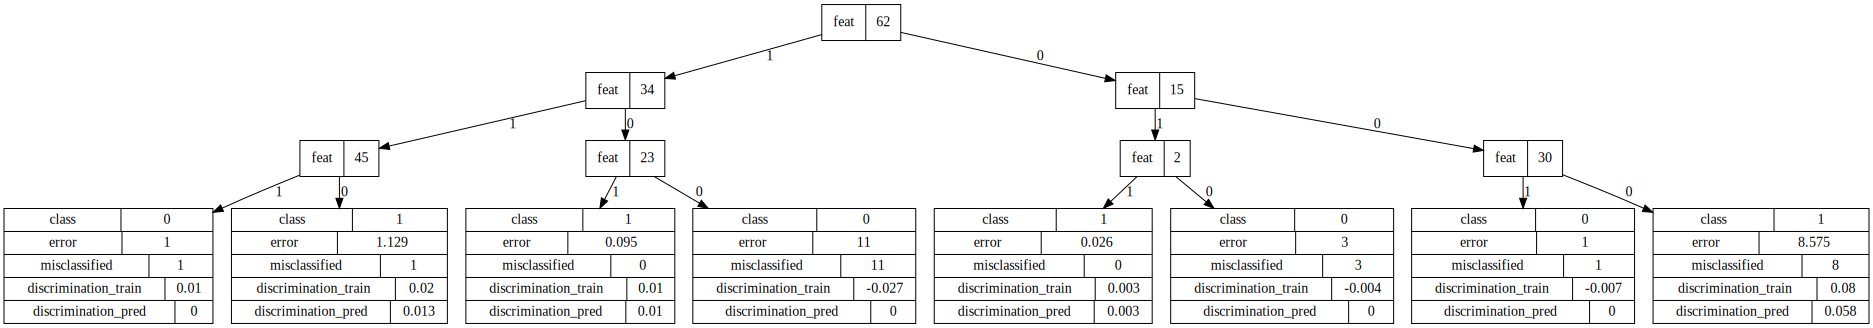

In [11]:

X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = utils.train_test_split(1, X, y, sensitive)

clf = DL85Classifier(max_depth=3, error_function=lambda tids: utils.error(list(tids), 10, y_train, sensitive_train), min_sup=1, time_limit=600)
clf.fit(X_train, list(y_train))
y_pred_train = clf.predict(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print(f'accuracy_pred = {round(accuracy_score(y_train, y_pred_train), 8)}')
print(f'accuracy_test = {round(accuracy_score(y_test, y_pred_test), 8)}')
print(f'discrimination_train = {round(utils.discrimination(y_train, sensitive_train), 8)}')
print(f'discrimination_train_pred = {round(utils.discrimination(y_pred_train, sensitive_train), 8)}')

utils.tree_upgrade(clf.tree_, y_train, np.asarray(y_pred_train), sensitive_train)
dot = utils.export_graphviz(clf)
graph = graphviz.Source(dot, format="png")
graph.render("plots/"+FILE_NAME+"tree")
graphviz.Source(dot)


In [12]:
discri_test= list()
utils.get_discri_test(clf.tree_, X_test, y_test, sensitive_test, discri_test, X.columns, path=None)
sum_discrimination_additive_test_pred = sum(discri_test)
sum_discrimination_additive_test_pred_abs = 0
[sum_discrimination_additive_test_pred_abs := sum_discrimination_additive_test_pred_abs + abs(d) for d in discri_test]
print(sum_discrimination_additive_test_pred)
sum_discrimination_additive_test_pred_abs

0.24583333333333332


0.24583333333333332

In [13]:
discri_test

[0.0,
 0.0,
 0.0,
 0.002083333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.03333333333333333,
 0.11041666666666666]

In [14]:
utils.discrimination(y_train, sensitive_train)

0.08333333333333331

In [15]:
print(utils.sum_elem_tree(clf.tree_, 'discrimination_additive_train'))
print(utils.sum_elem_tree(clf.tree_, 'discrimination_additive_train', do_abs=True))
print(utils.sum_elem_tree(clf.tree_, 'discrimination_additive_pred'))
print(utils.sum_elem_tree(clf.tree_, 'discrimination_additive_pred', do_abs=True))

0.08333333333333333
0.1599206349206349
0.08253968253968252
0.08253968253968252


In [16]:
utils.sum_elem_tree(clf.tree_, 'misclassified')

25

In [17]:
print(utils.discrimination(y_train, sensitive_train))
print(utils.discrimination(y_pred_train, sensitive_train))
print(utils.discrimination(y_test, sensitive_test))
print(utils.discrimination(y_pred_test, sensitive_test))

0.08333333333333331
0.08253968253968258
0.24583333333333335
0.052083333333333315


In [18]:
clf.tree_

{'feat': 62,
 'left': {'feat': 34,
  'left': {'feat': 45,
   'left': {'value': 0,
    'error': 1.0,
    'transactions': [229, 42, 93],
    'proba': [0.6666666666666666, 0.3333333333333333],
    'discrimination_additive_train': 0.009523809523809525,
    'discrimination_additive_pred': 0.0,
    'misclassified': 1},
   'right': {'value': 1,
    'error': 1.128968,
    'transactions': [130, 107, 172, 235, 60, 20, 149, 214, 121, 28],
    'proba': [0.1, 0.9],
    'discrimination_additive_train': 0.01984126984126984,
    'discrimination_additive_pred': 0.012896825396825393,
    'misclassified': 1},
   'transactions': [130,
    229,
    42,
    107,
    172,
    235,
    60,
    20,
    149,
    214,
    121,
    28,
    93],
   'proba': [0.23076923076923078, 0.7692307692307693]},
  'right': {'feat': 23,
   'left': {'value': 1,
    'error': 0.095238,
    'transactions': [43],
    'proba': [0, 1.0],
    'discrimination_additive_train': 0.009523809523809525,
    'discrimination_additive_pred': 0.

# Graphs

<Figure size 648x432 with 0 Axes>

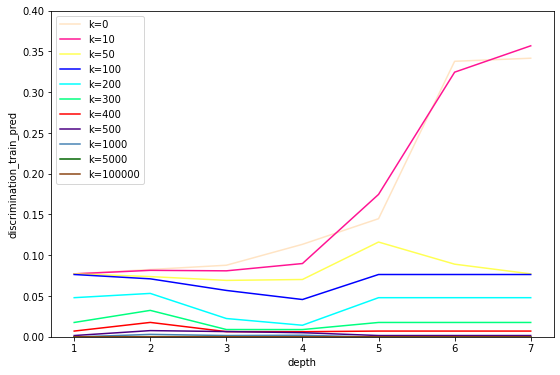

In [19]:
utils.plot_mean("depth", "discrimination_train_pred", result, 0, 0.4)

<Figure size 648x432 with 0 Axes>

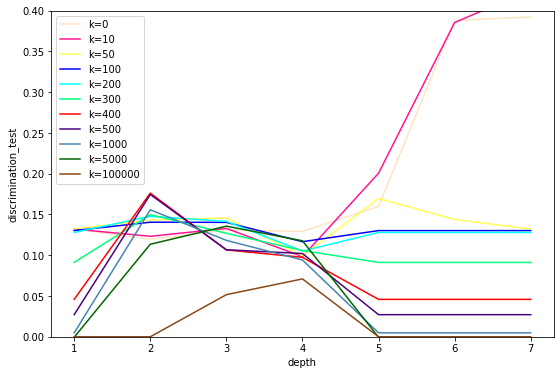

In [20]:
utils.plot_mean("depth", "discrimination_test", result, 0, 0.4)

<Figure size 648x432 with 0 Axes>

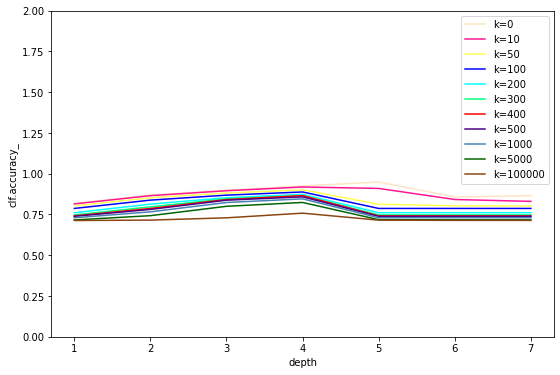

In [21]:
utils.plot_mean("depth", "clf.accuracy_", result, 0, 2)

<Figure size 648x432 with 0 Axes>

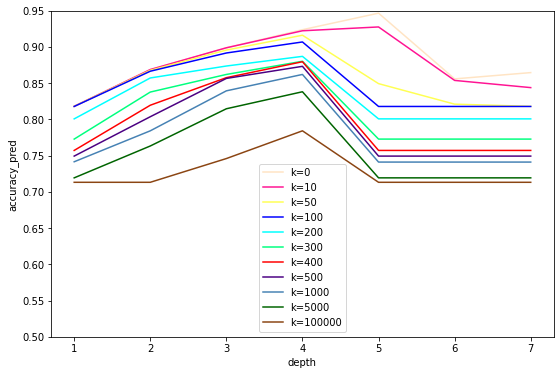

In [22]:
utils.plot_mean("depth", "accuracy_pred", result, 0.5, 0.95)

<Figure size 648x432 with 0 Axes>

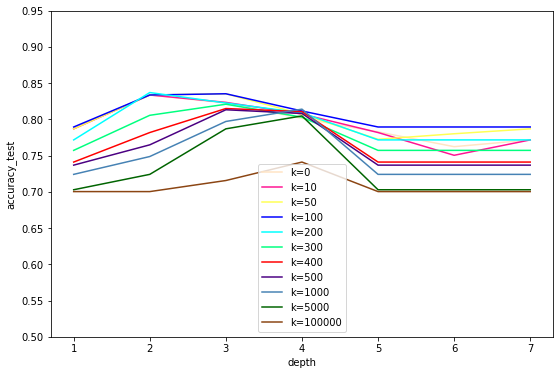

In [23]:
utils.plot_mean("depth", "accuracy_test", result, 0.5, 0.95)

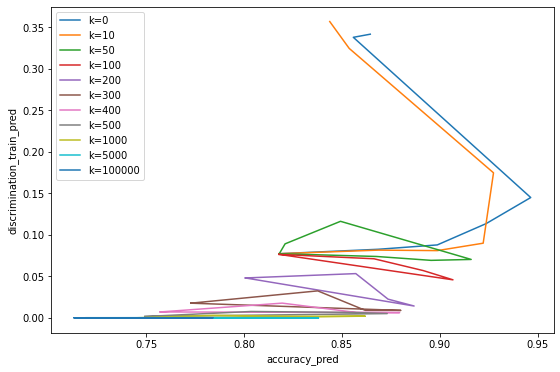

In [24]:
utils.plot2("accuracy_pred", "discrimination_train_pred", result)

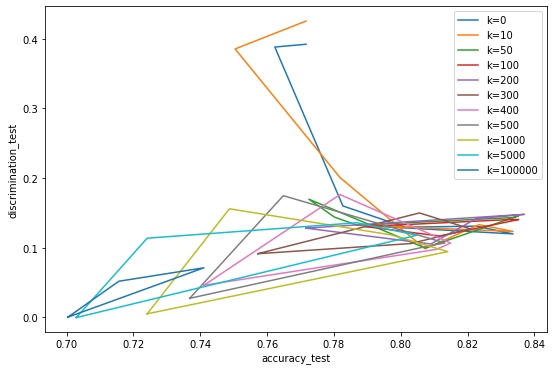

In [25]:
utils.plot2("accuracy_test", "discrimination_test", result)

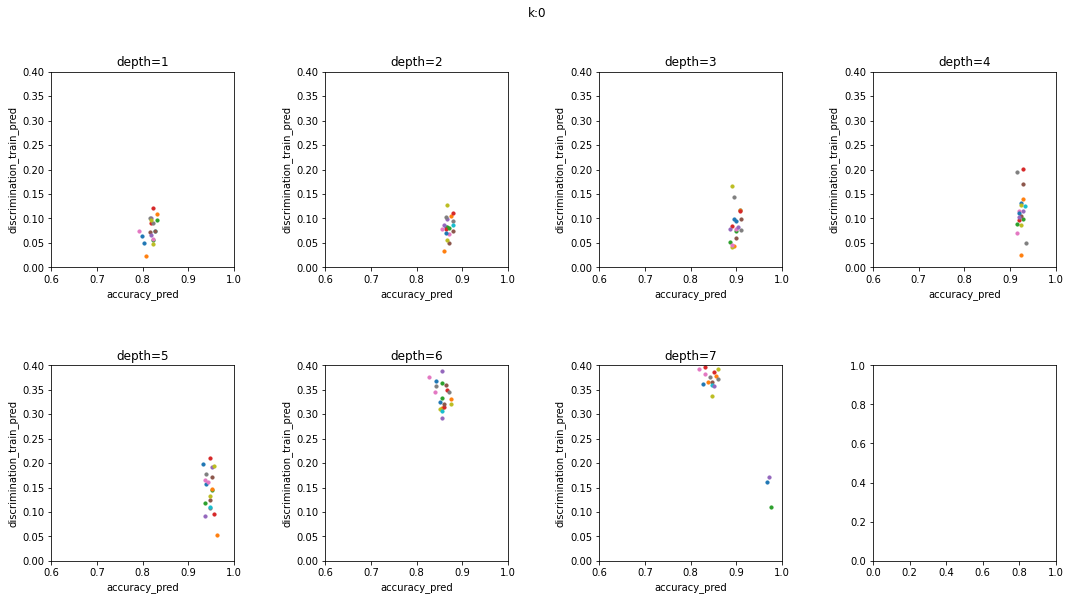

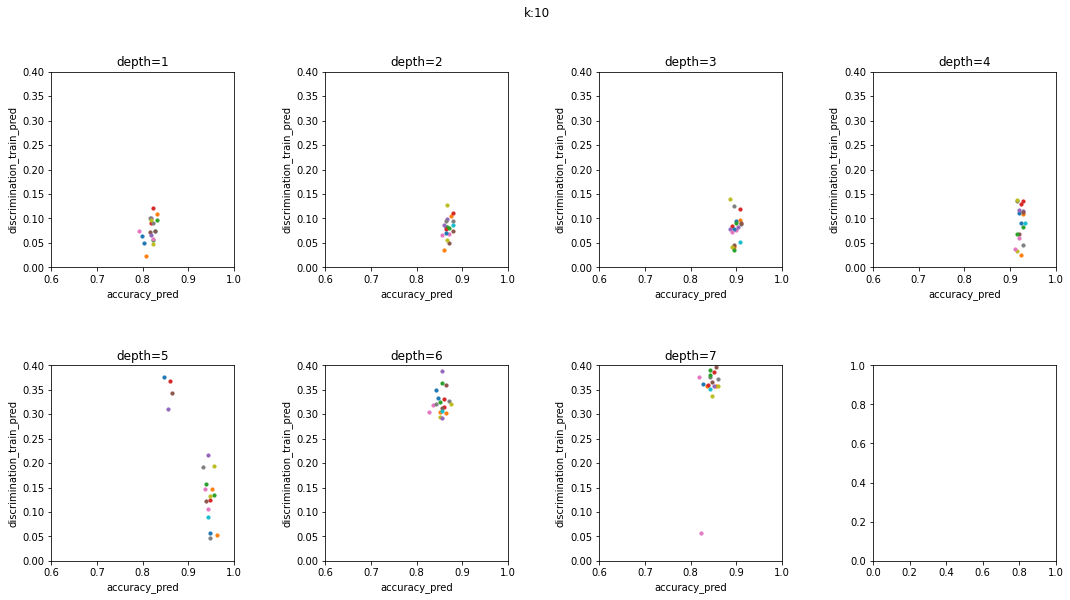

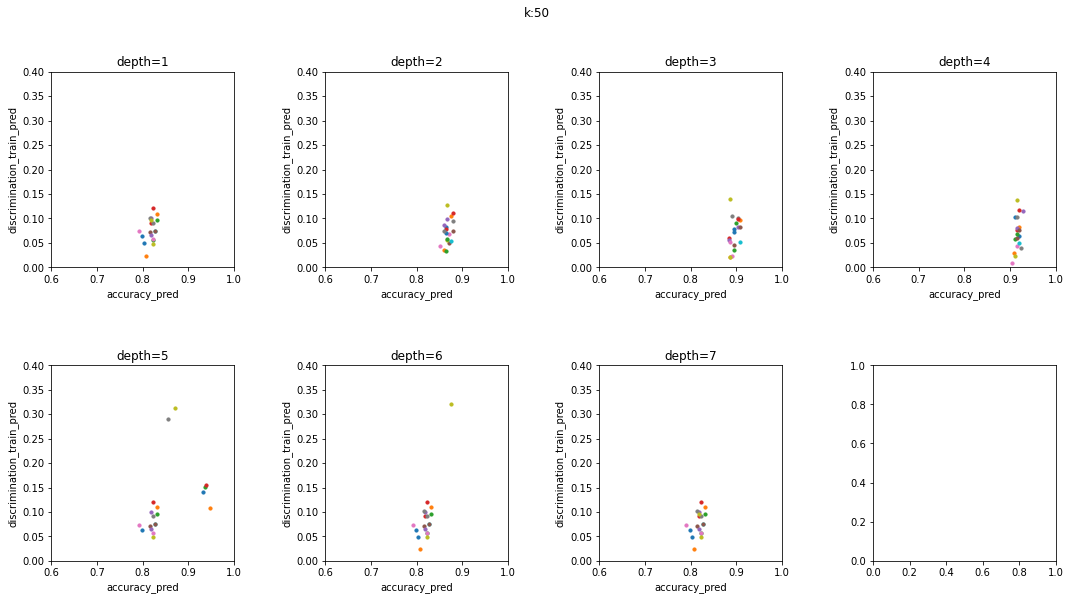

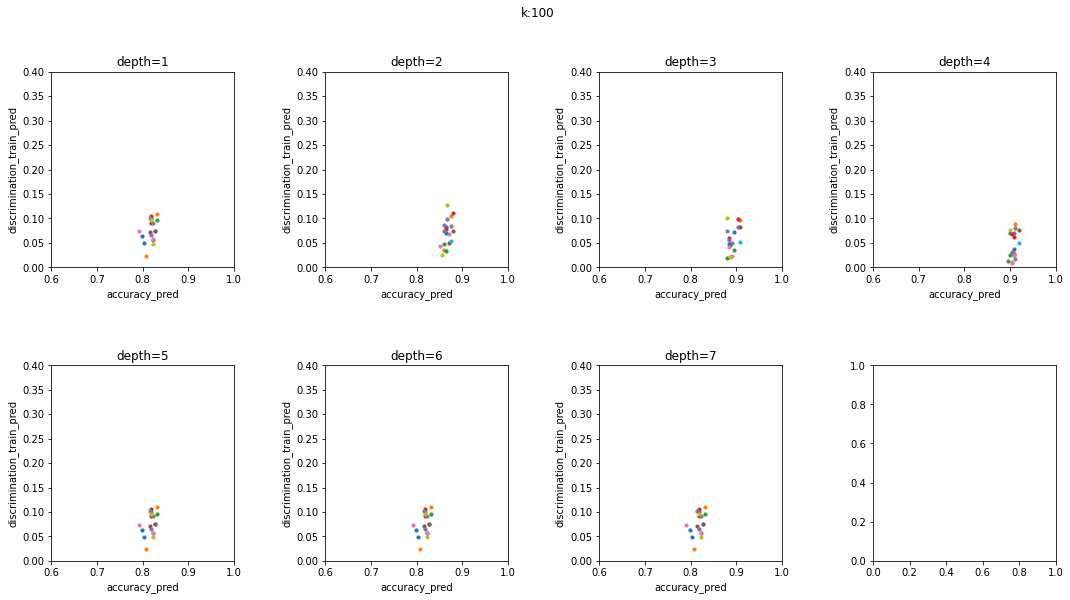

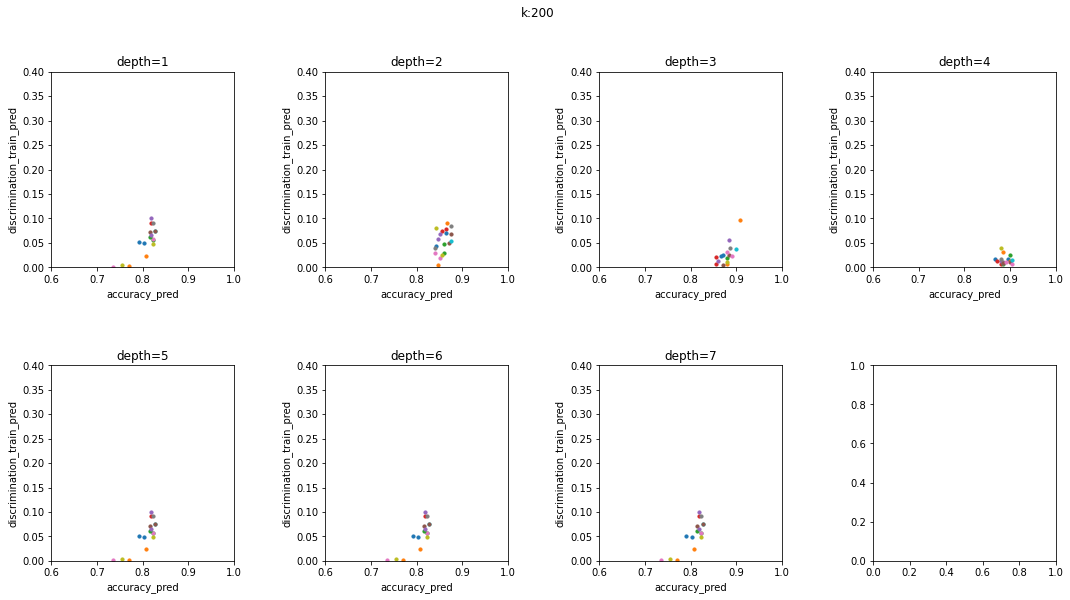

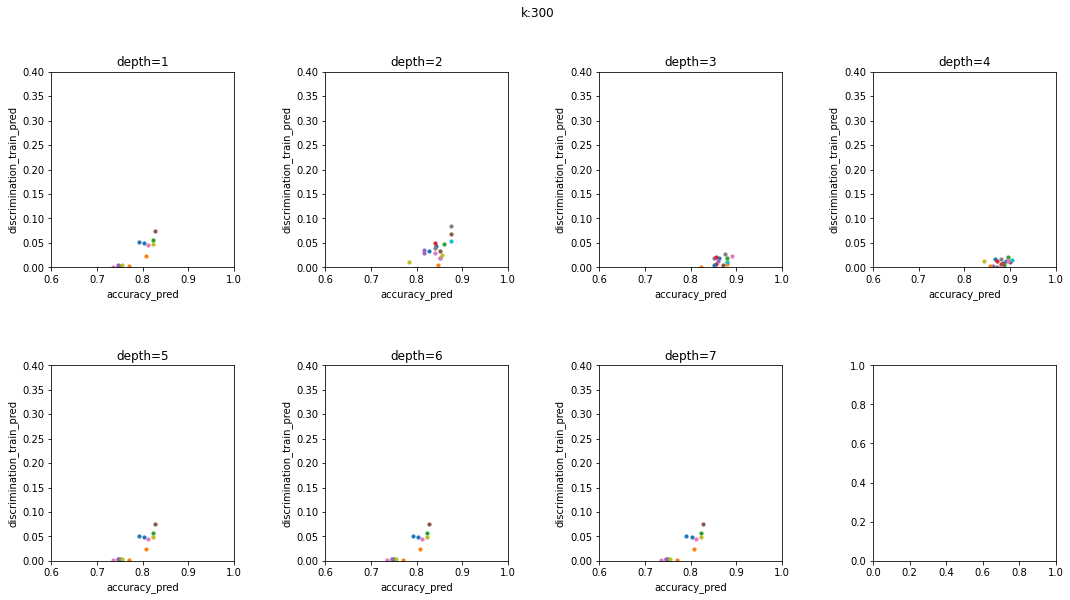

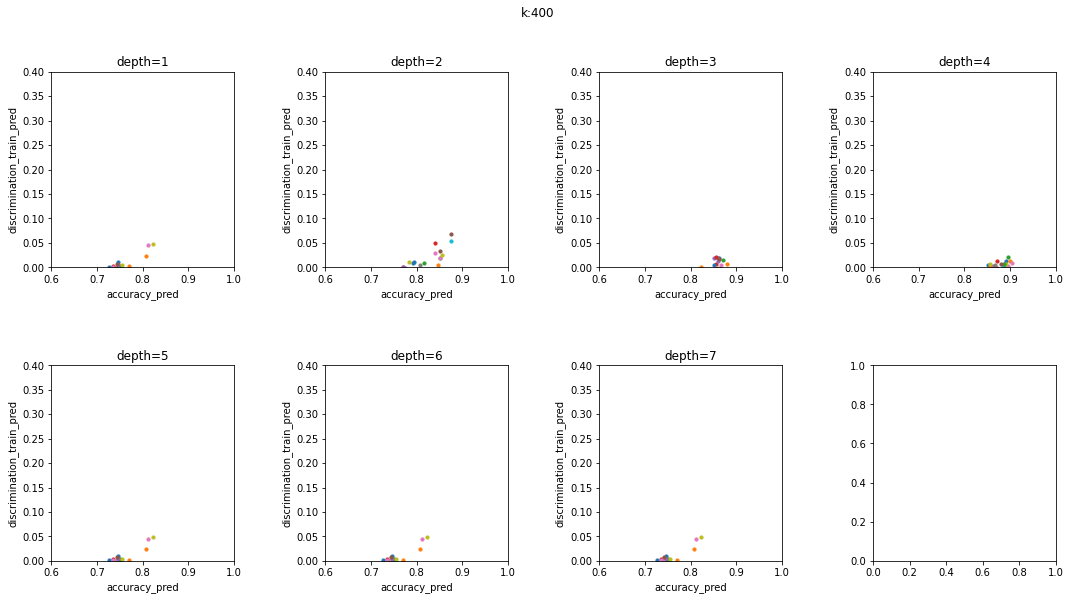

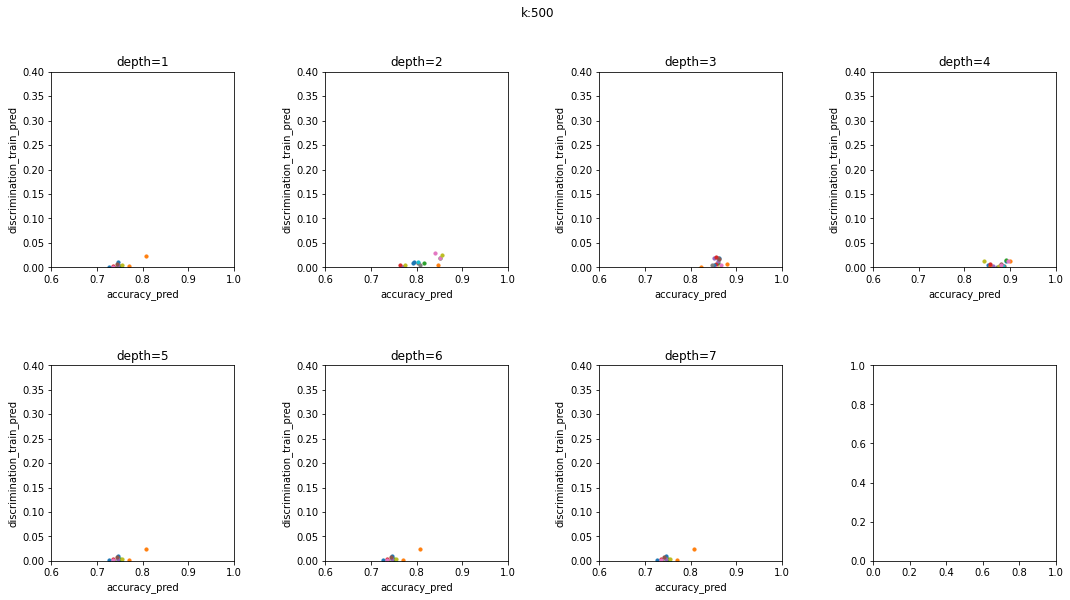

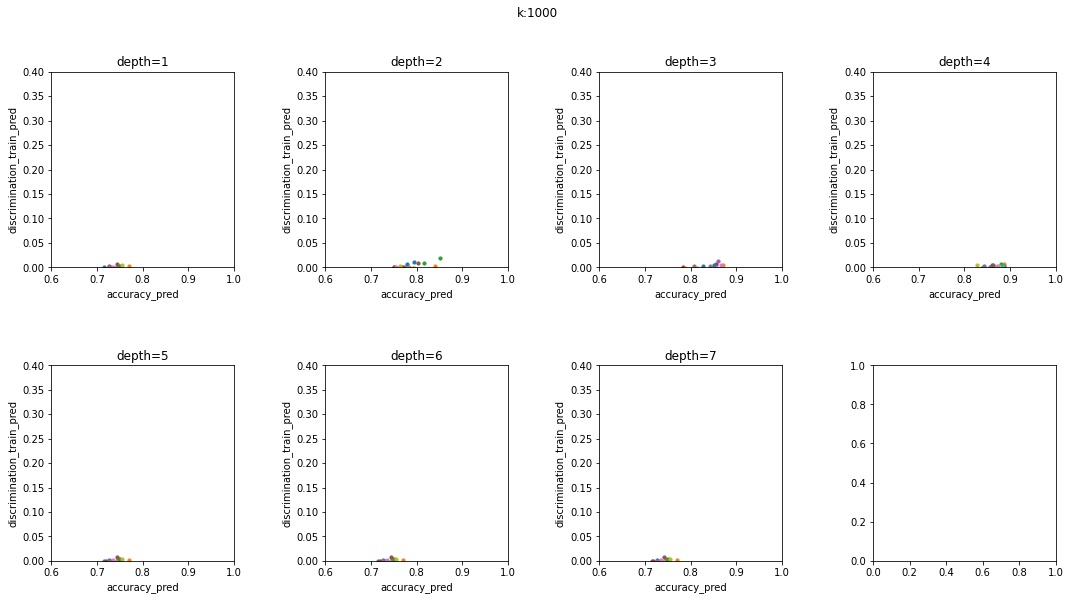

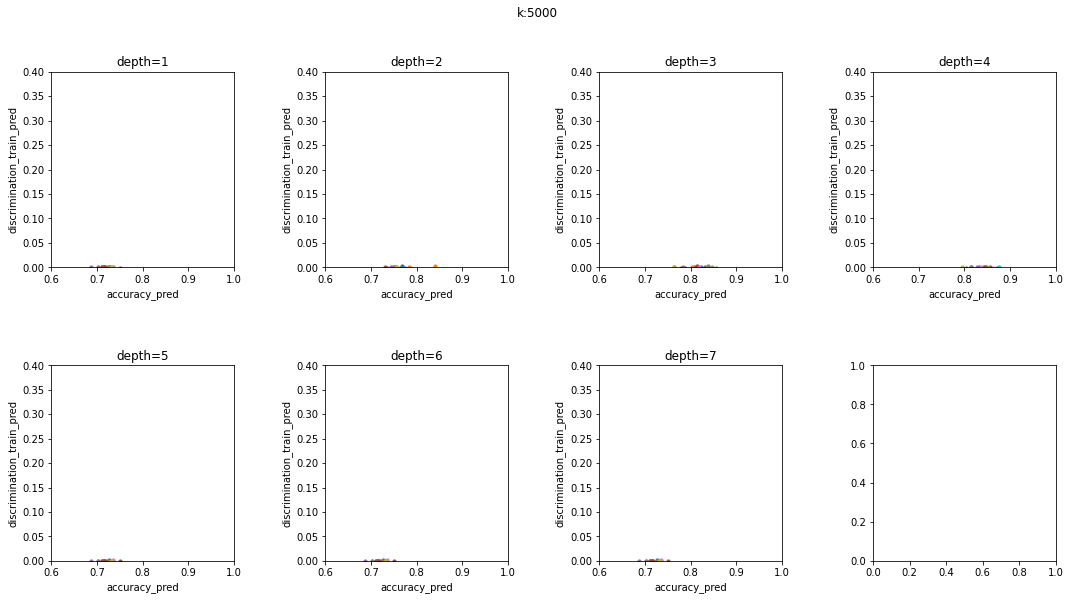

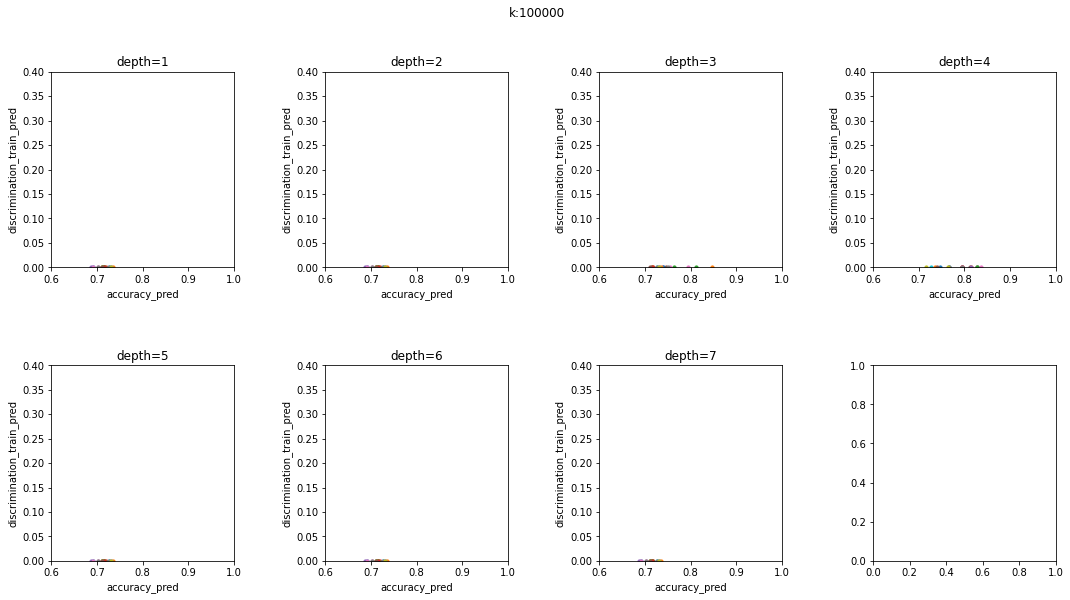

In [26]:
utils.plot_one_scatter_by_depth("accuracy_pred", "discrimination_train_pred", result, (0.6, 1), (0, 0.4))

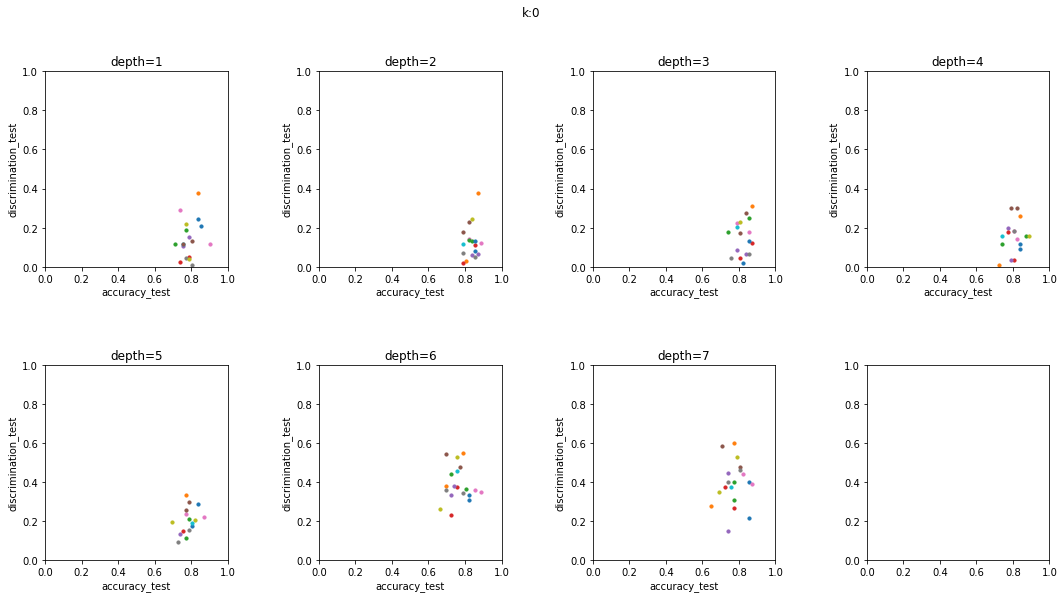

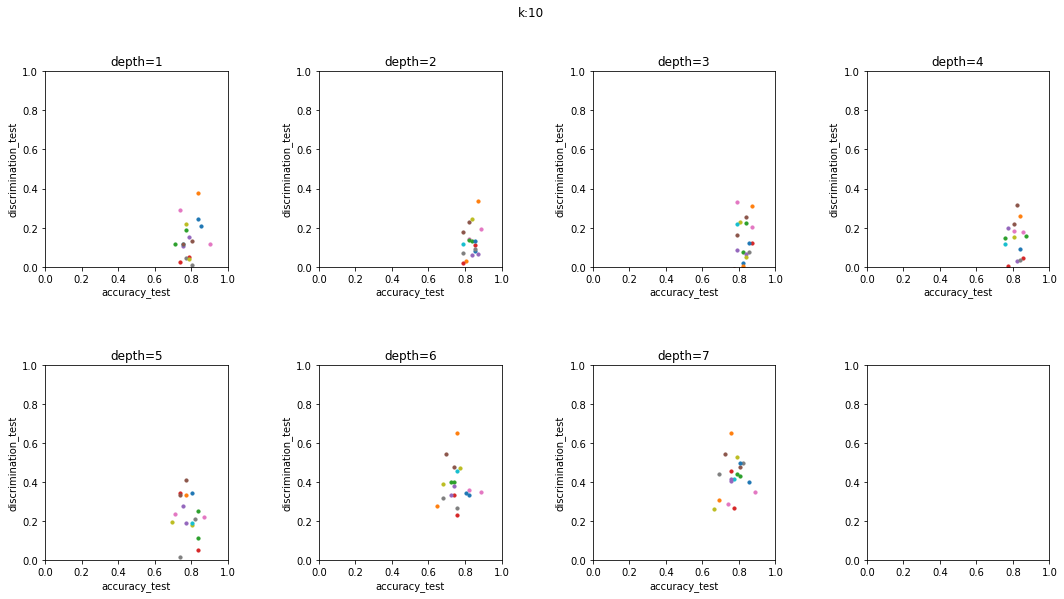

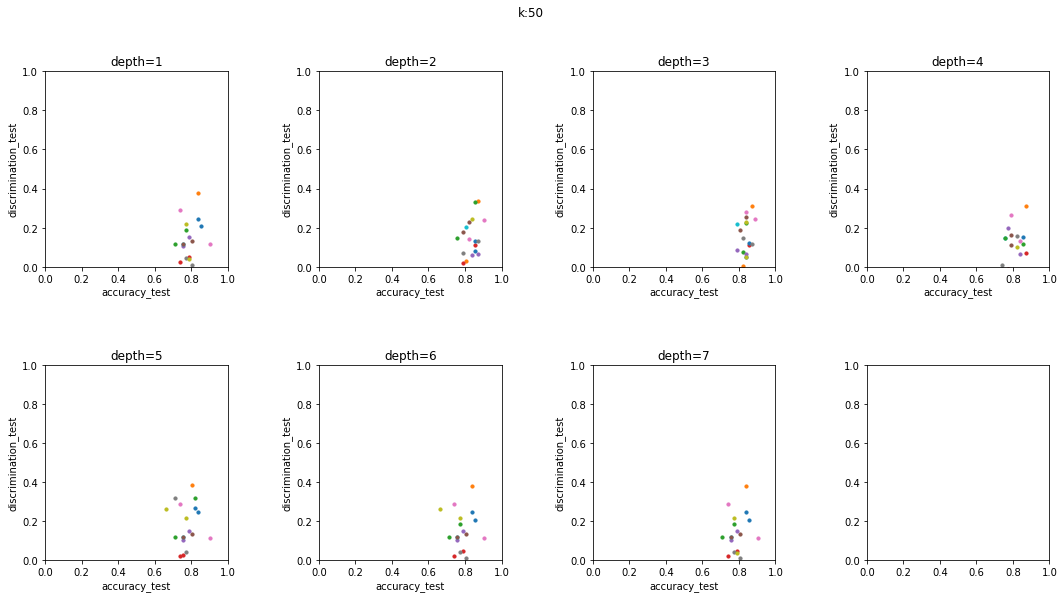

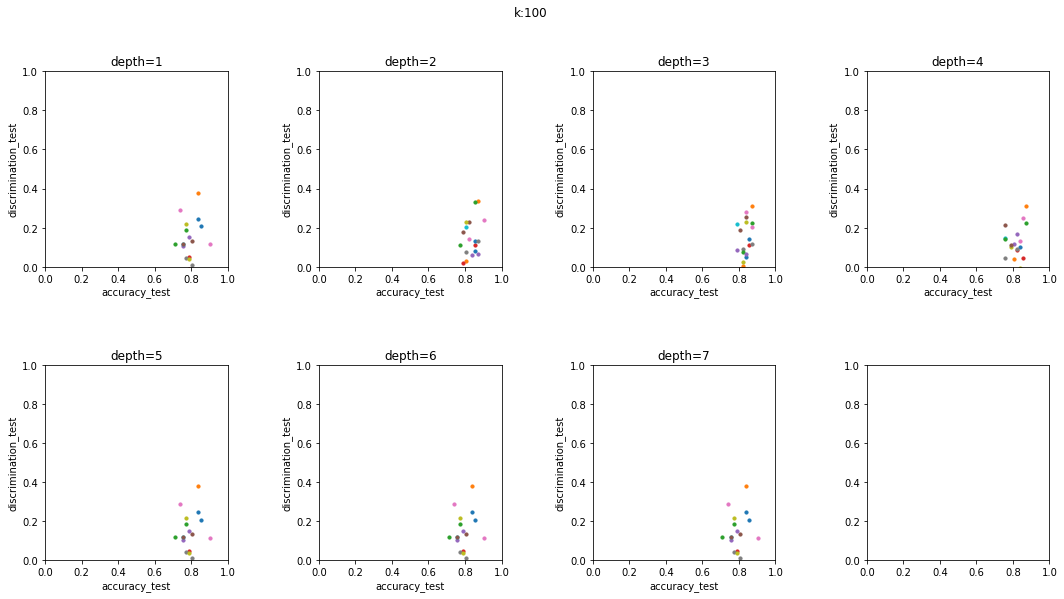

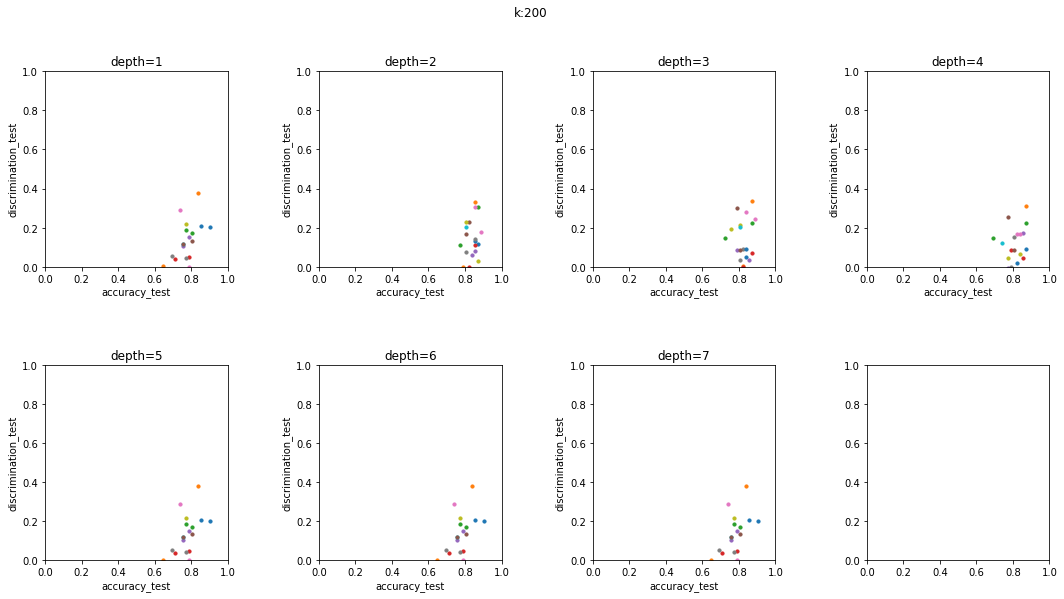

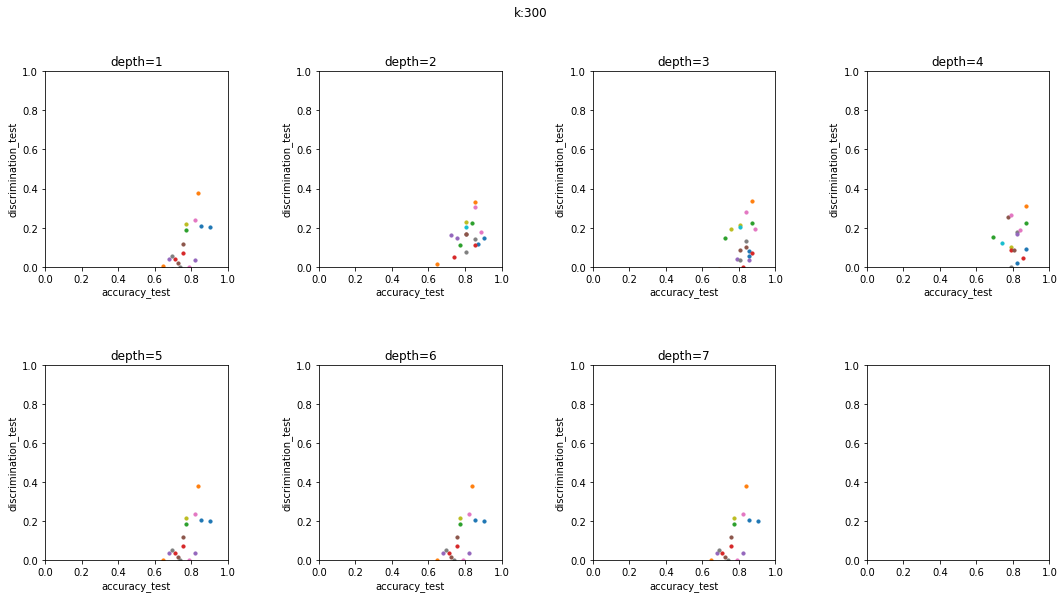

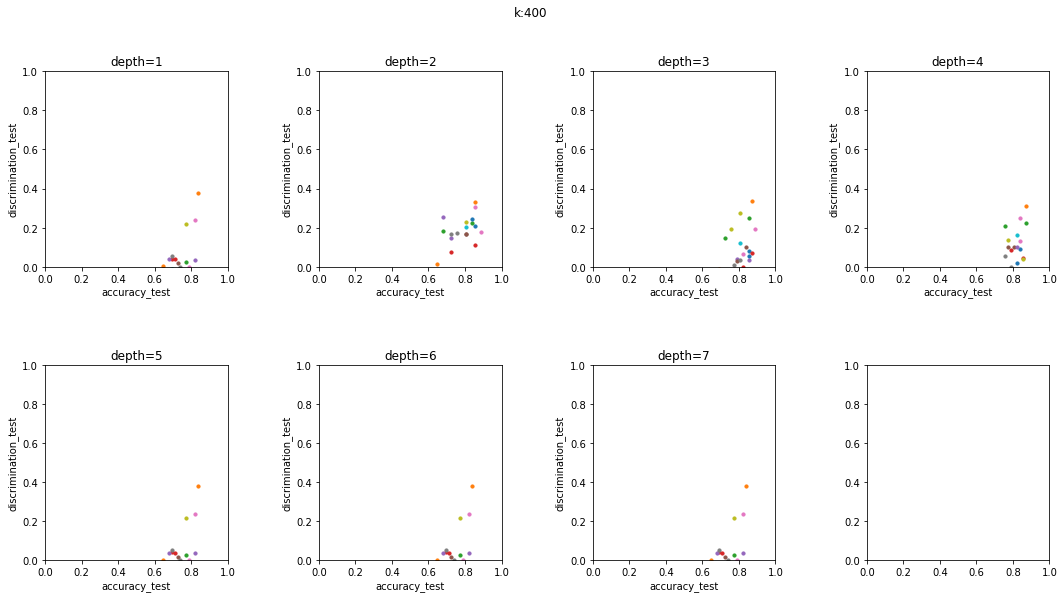

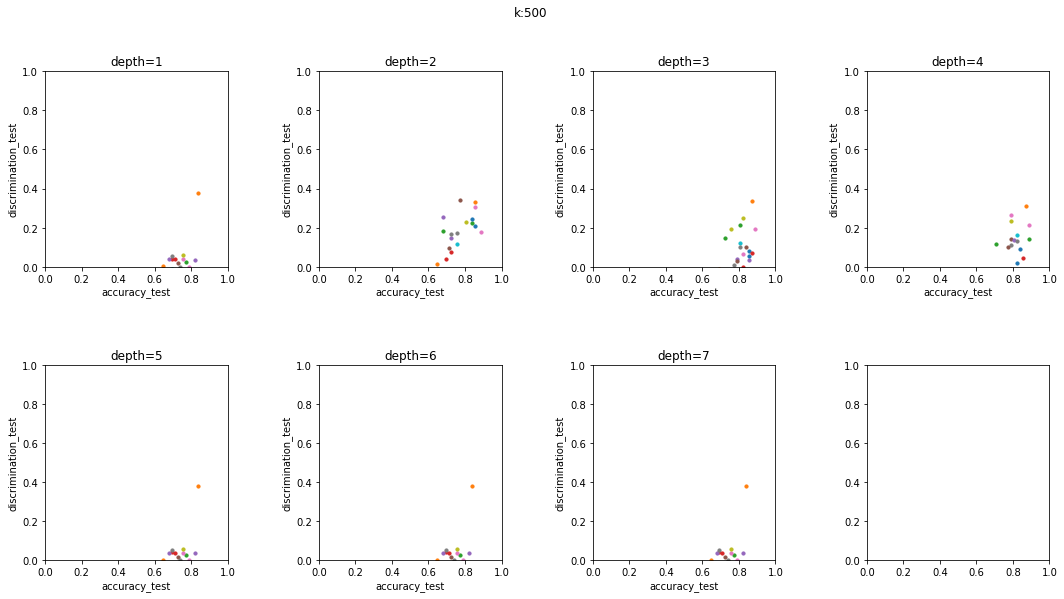

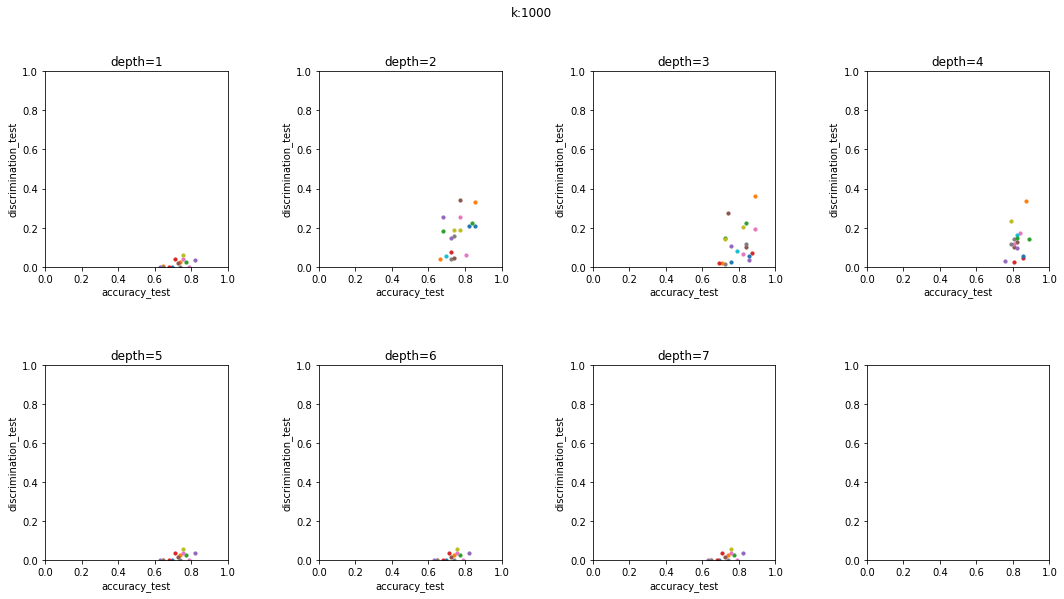

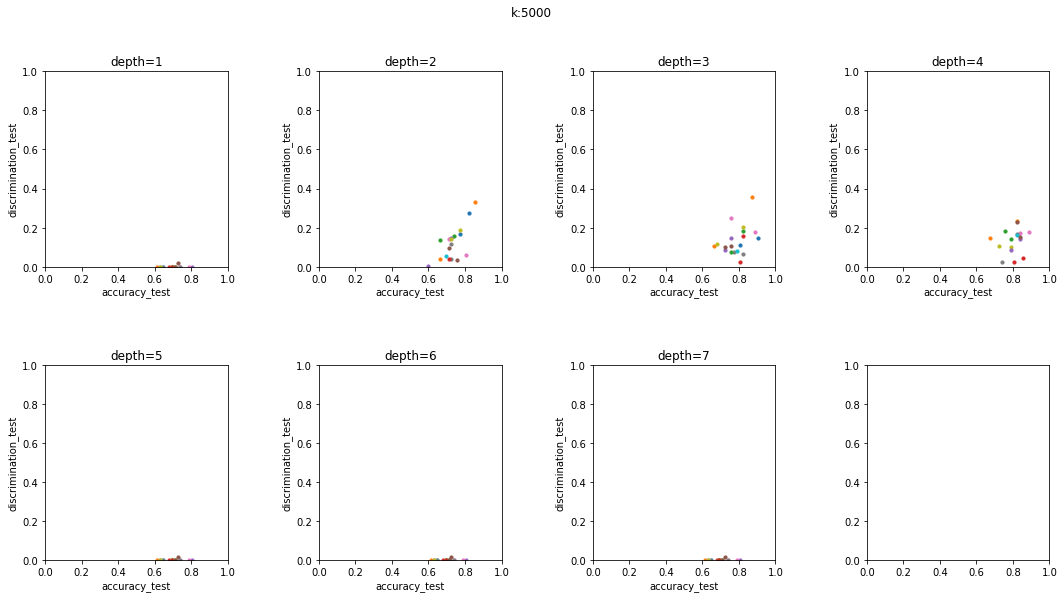

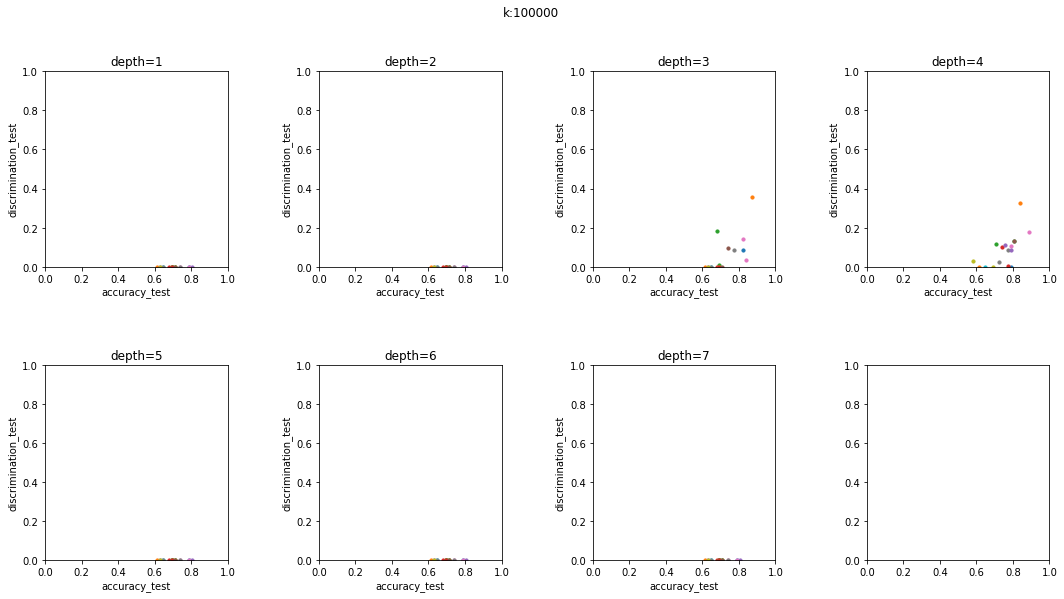

In [27]:
utils.plot_one_scatter_by_depth("accuracy_test", "discrimination_test", result, (0, 1), (0, 1))

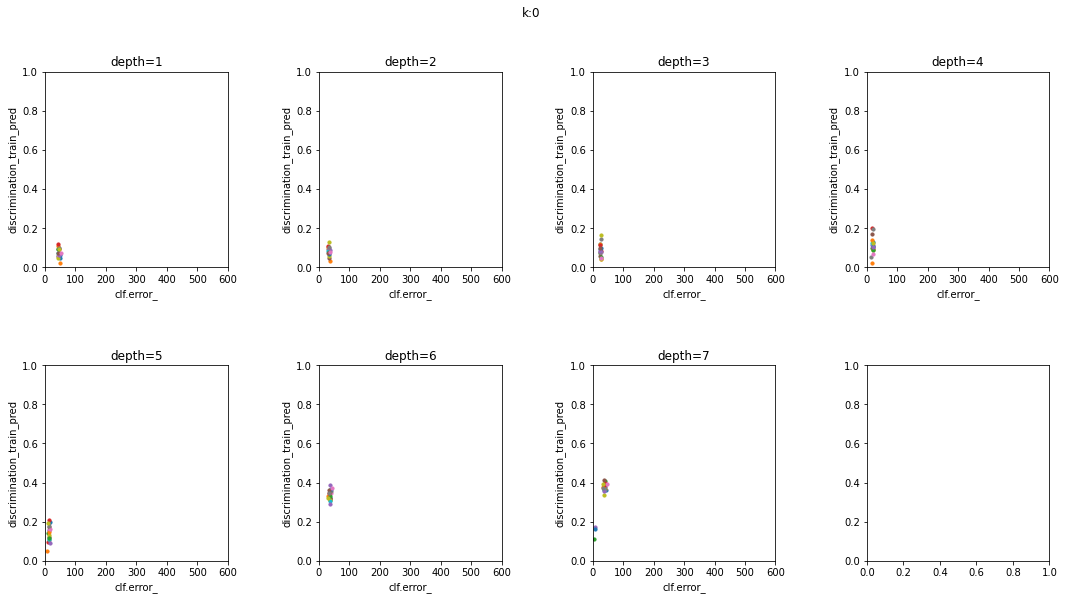

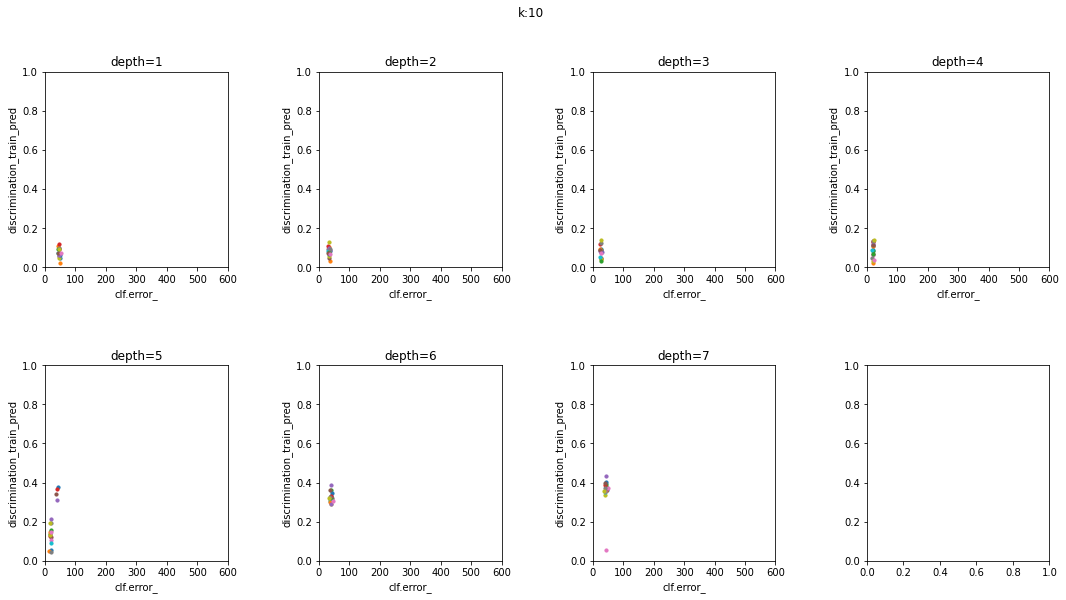

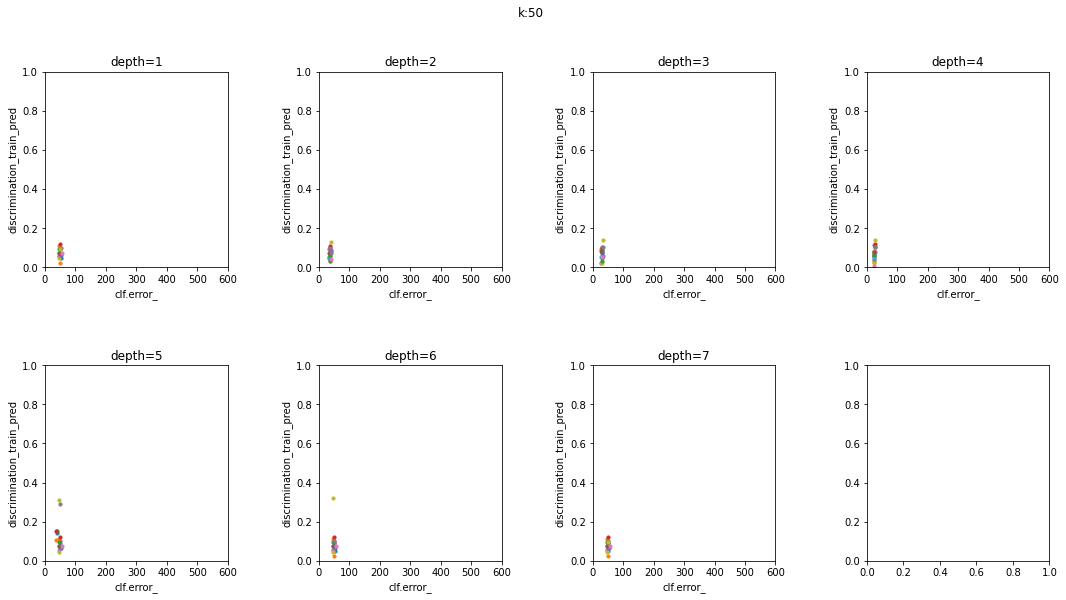

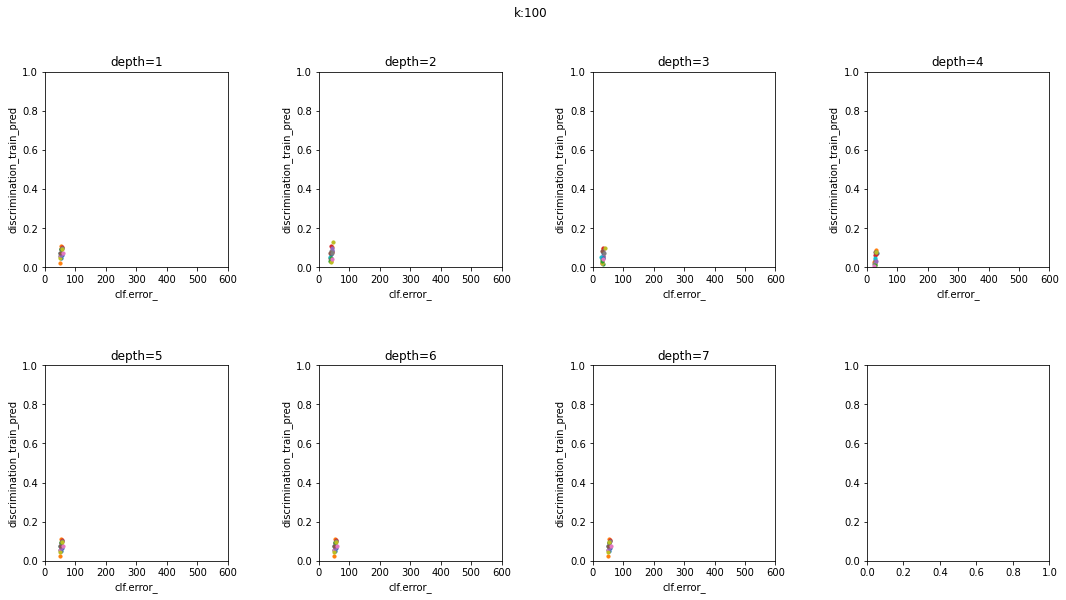

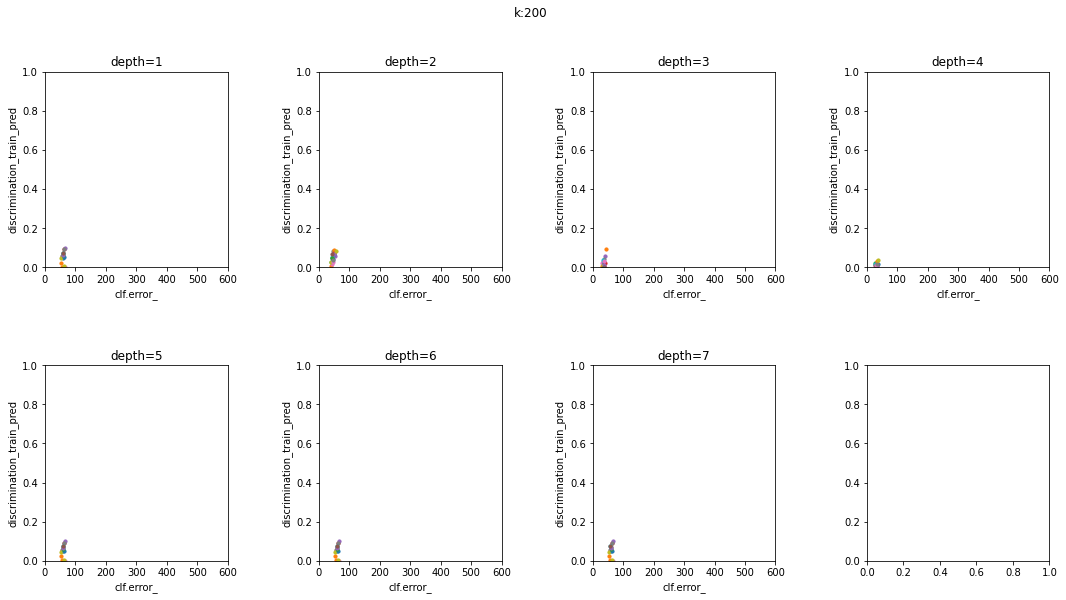

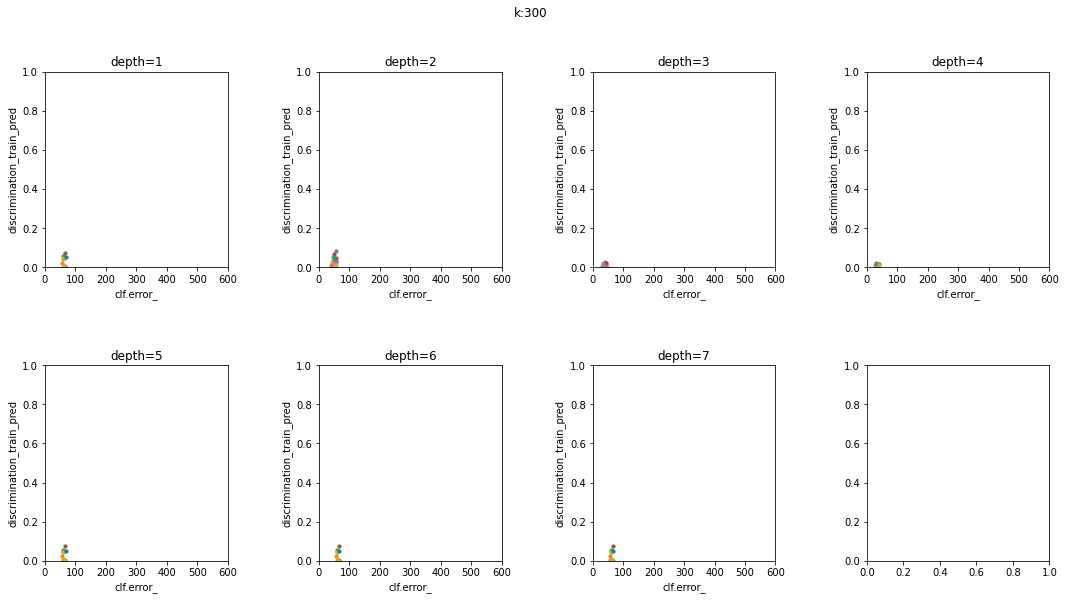

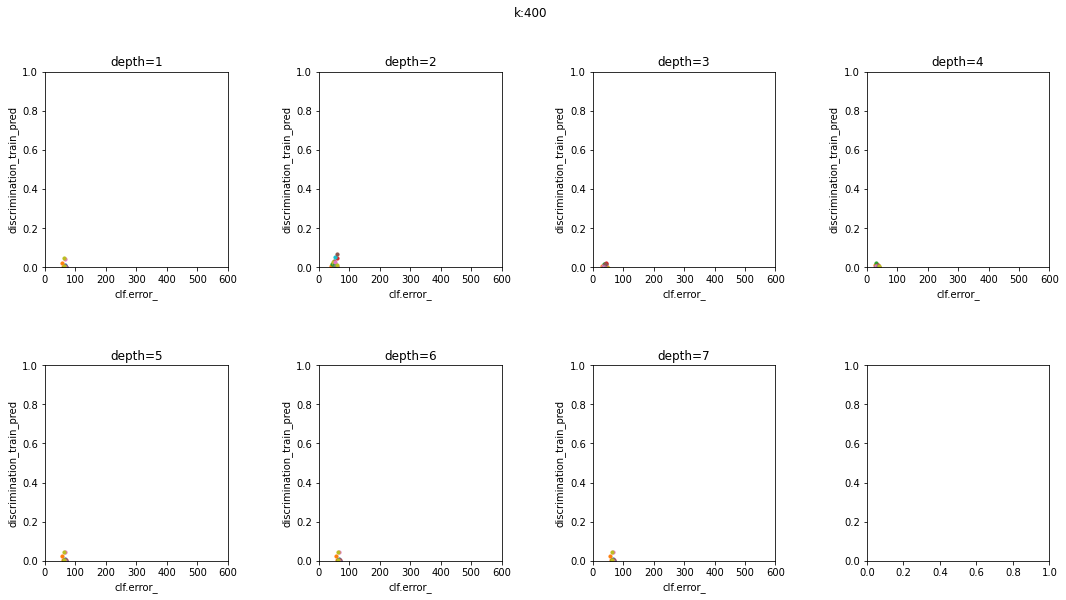

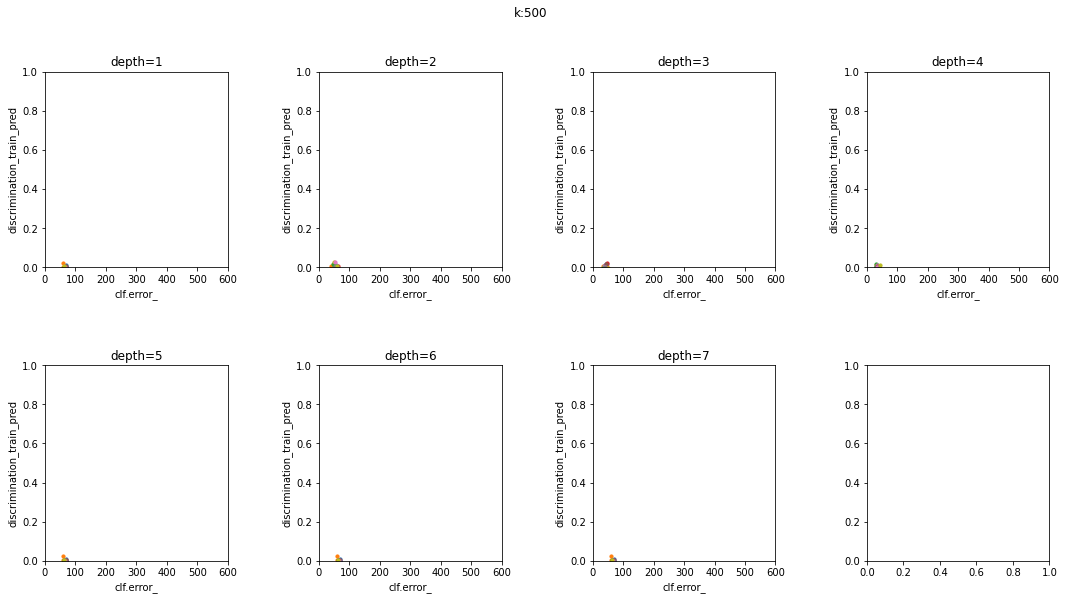

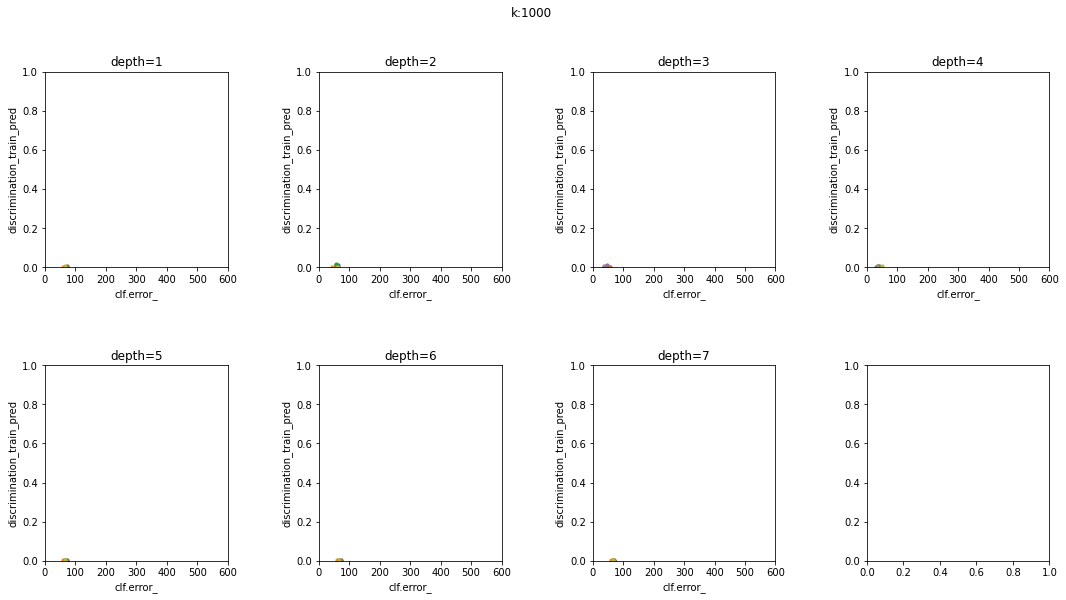

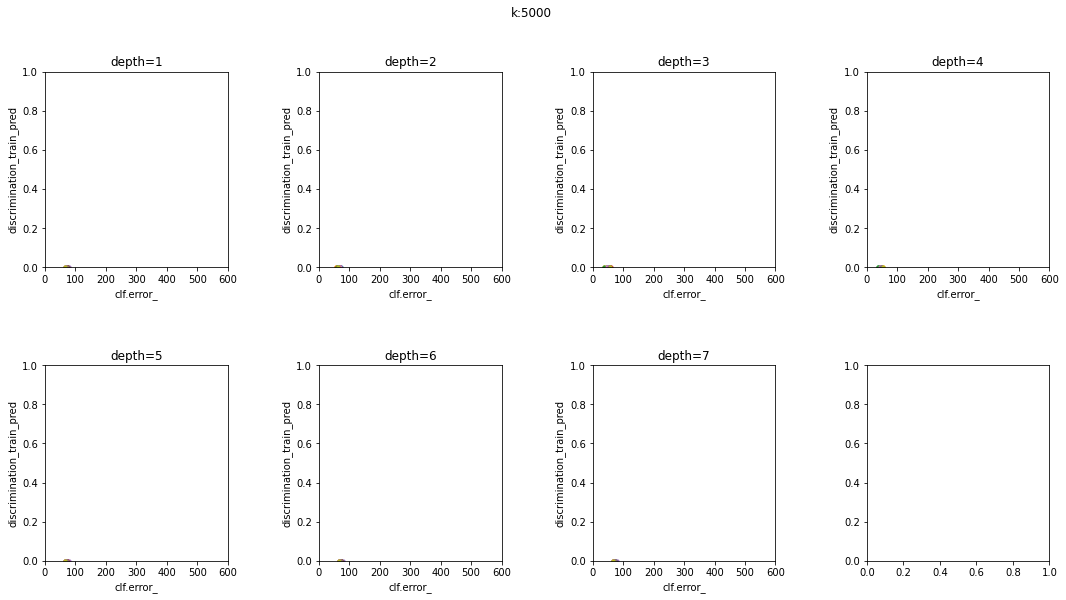

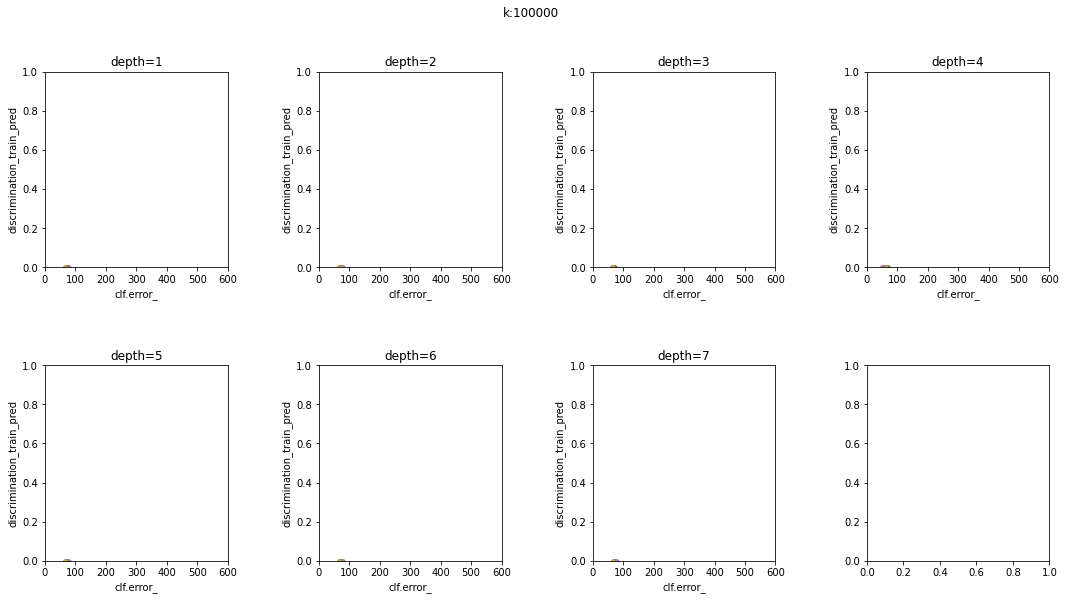

In [28]:
utils.plot_one_scatter_by_depth("clf.error_", "discrimination_train_pred", result, (0, 600), (0, 1))

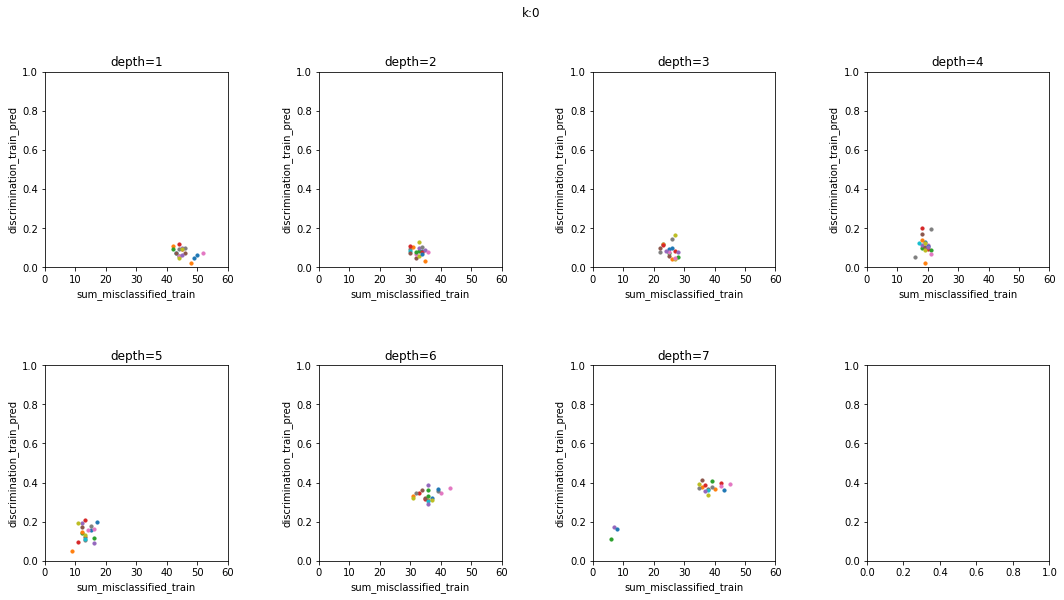

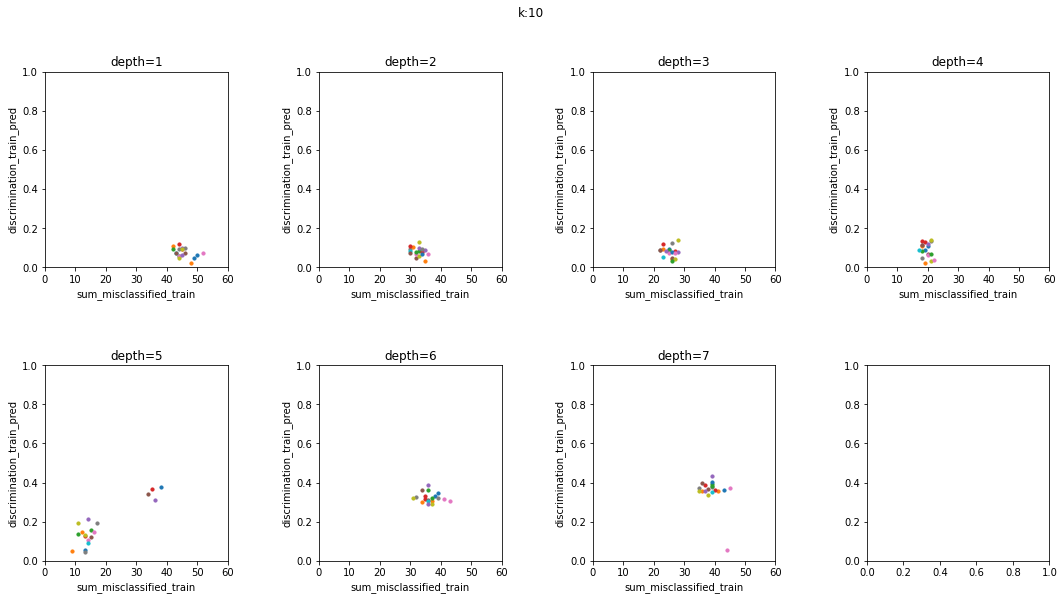

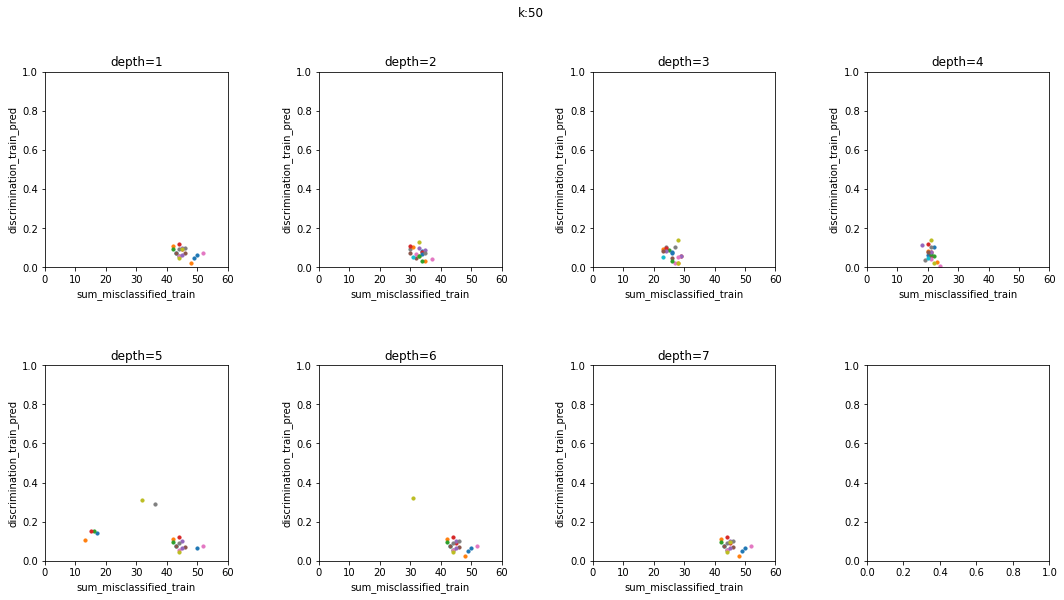

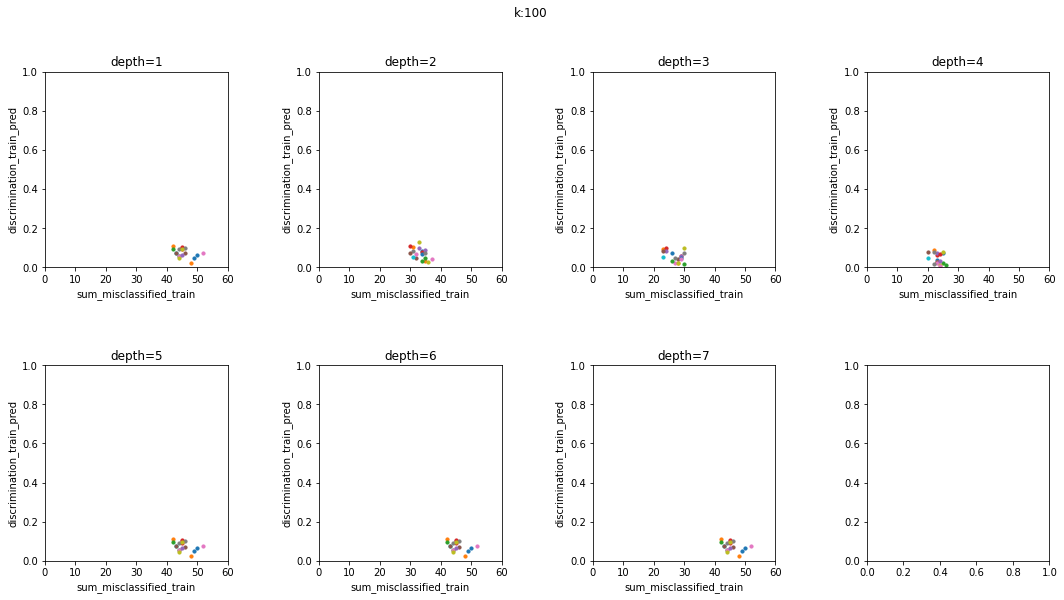

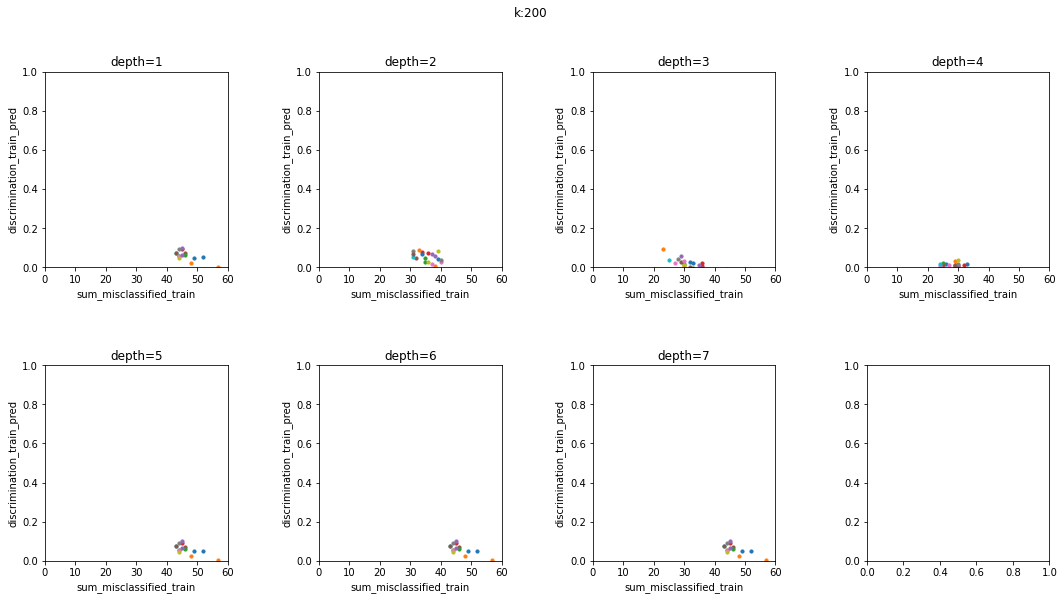

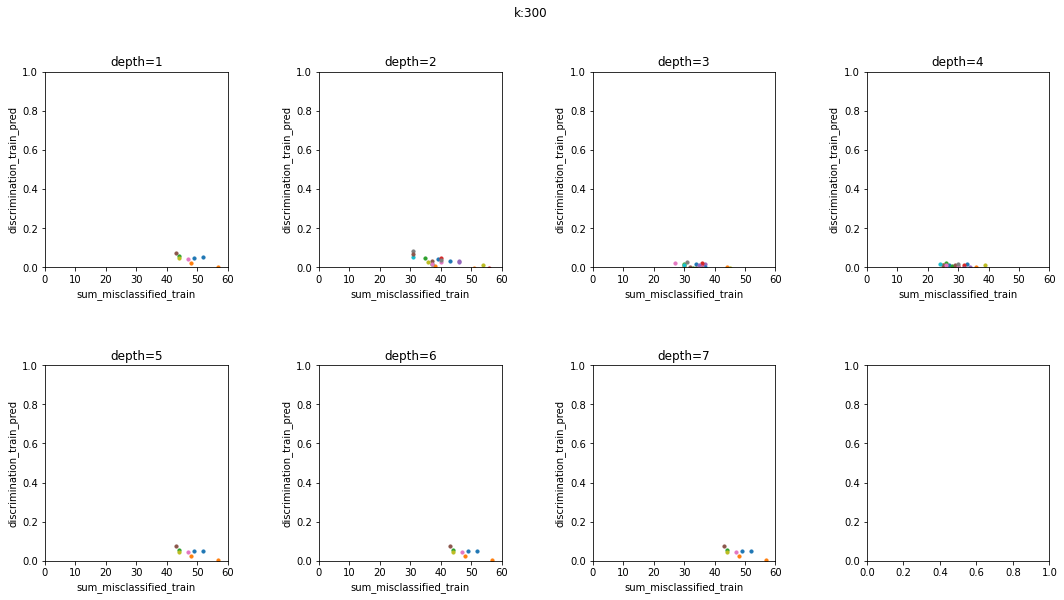

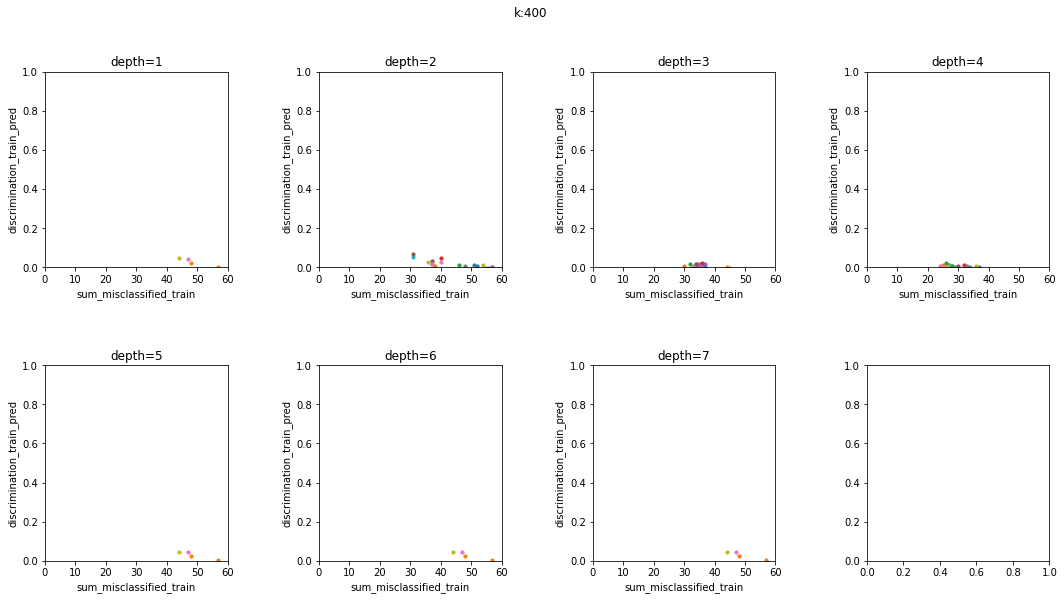

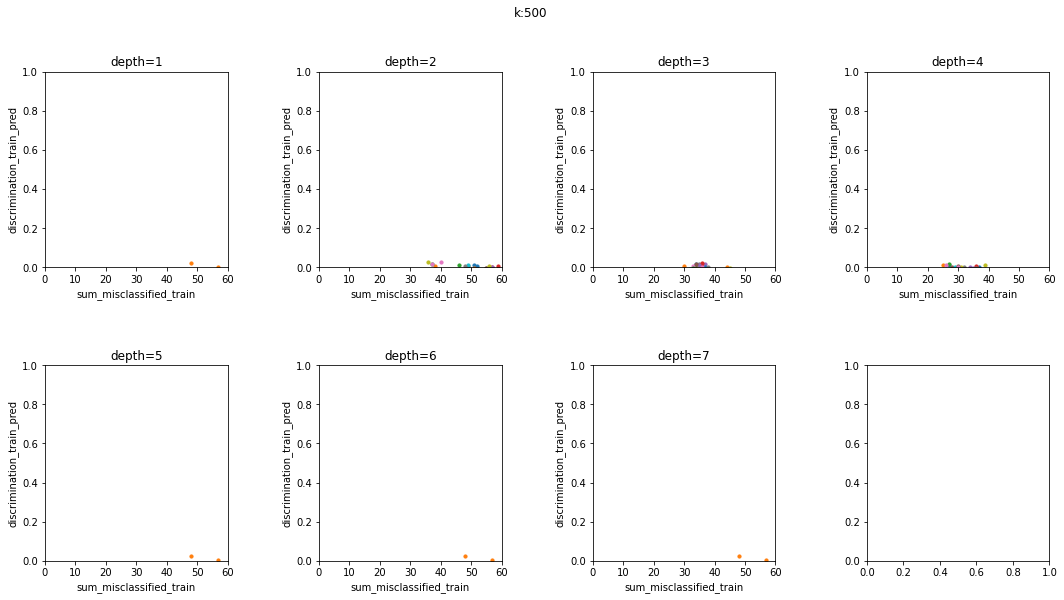

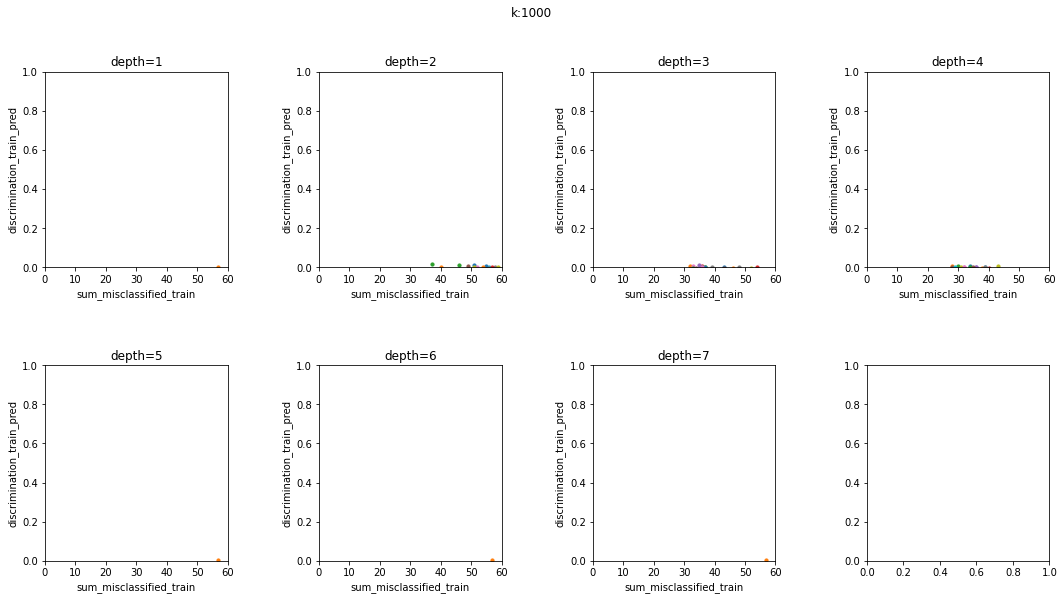

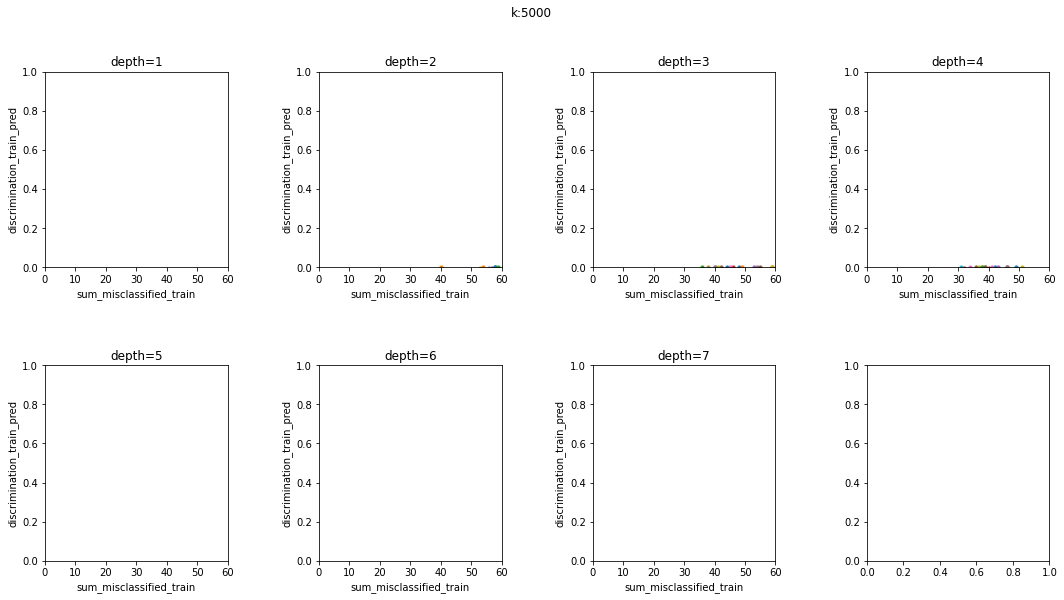

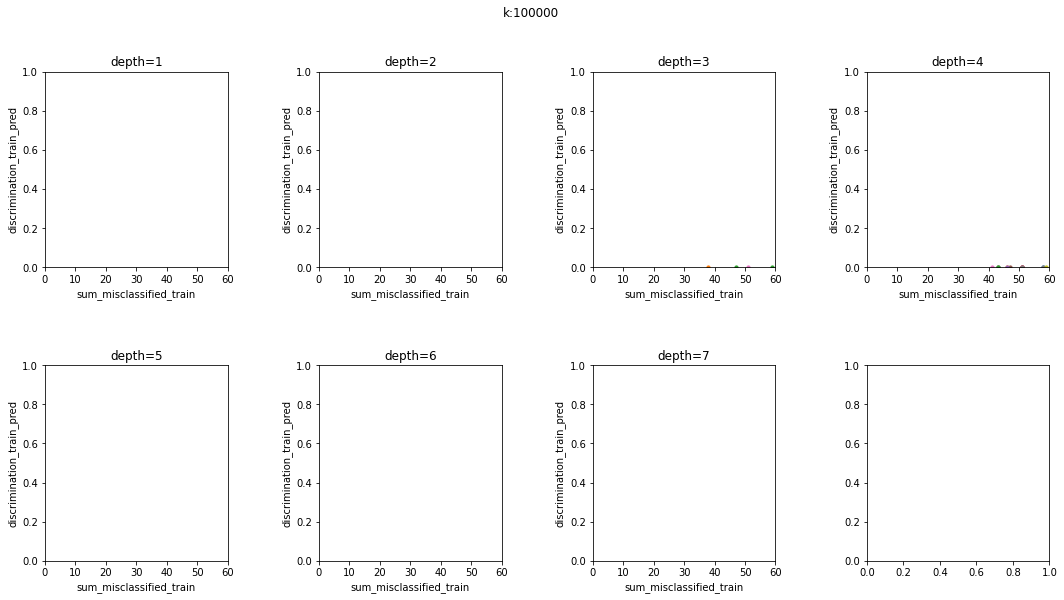

In [29]:
utils.plot_one_scatter_by_depth("sum_misclassified_train", "discrimination_train_pred", result, (0, 60), (0, 1))

In [ ]:
utils.plot_one_scatter_by_depth("sum_discrimination_additive_train_pred", "discrimination_train_pred", result, (0, 1), (0, 1))

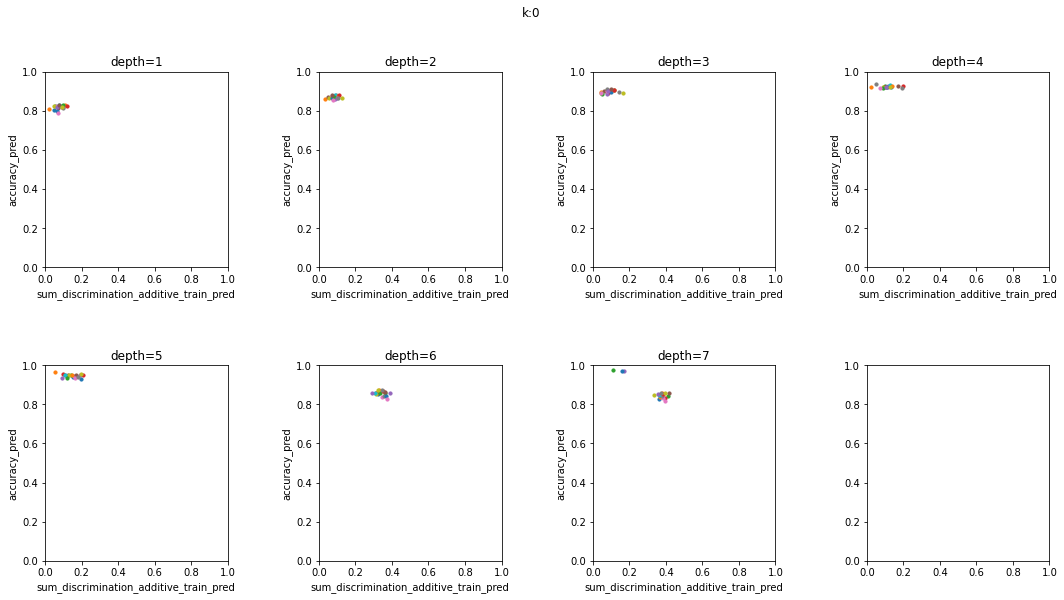

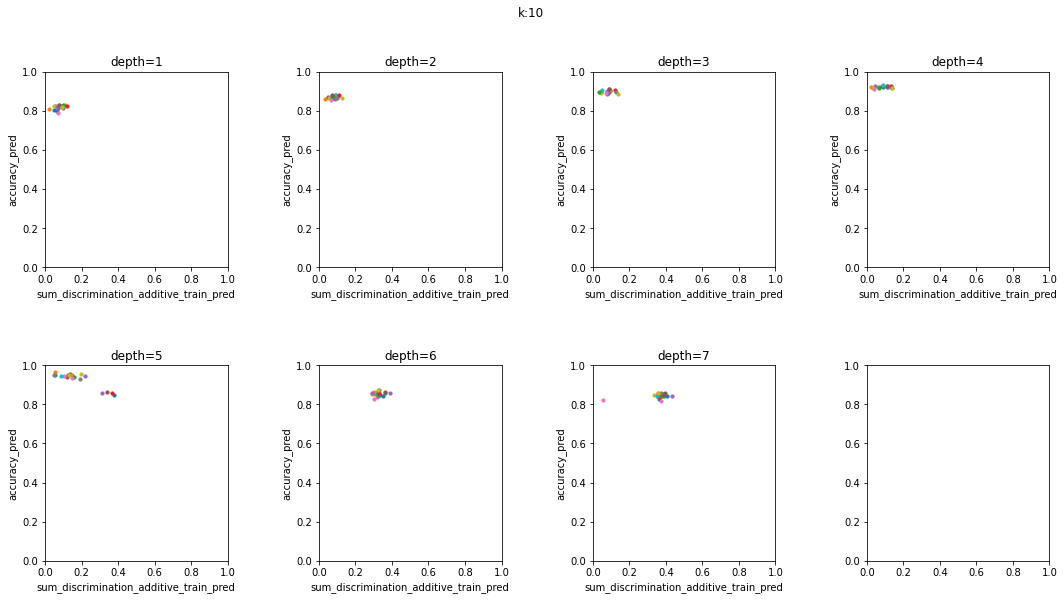

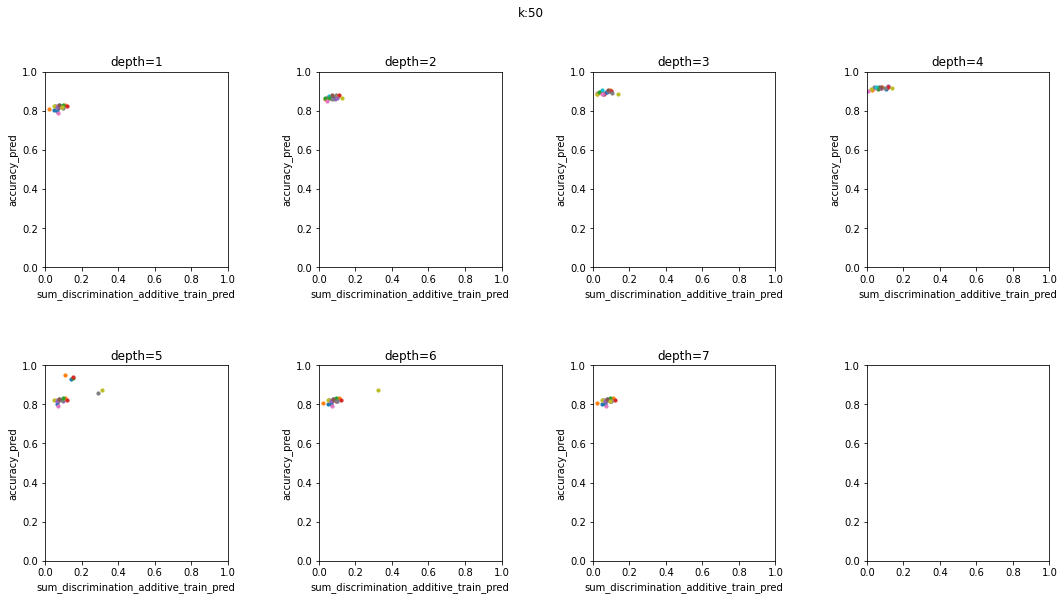

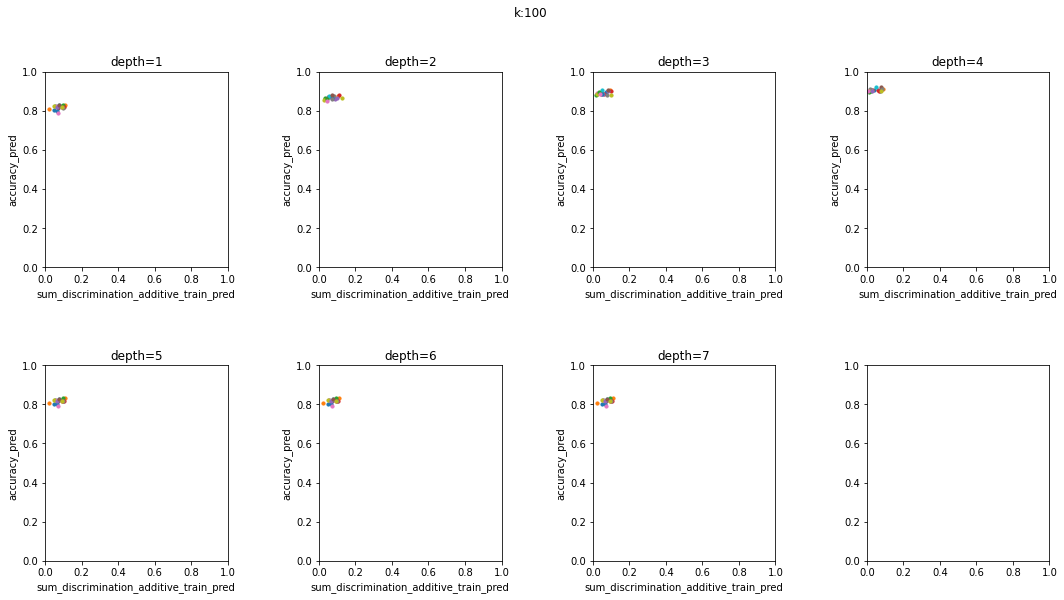

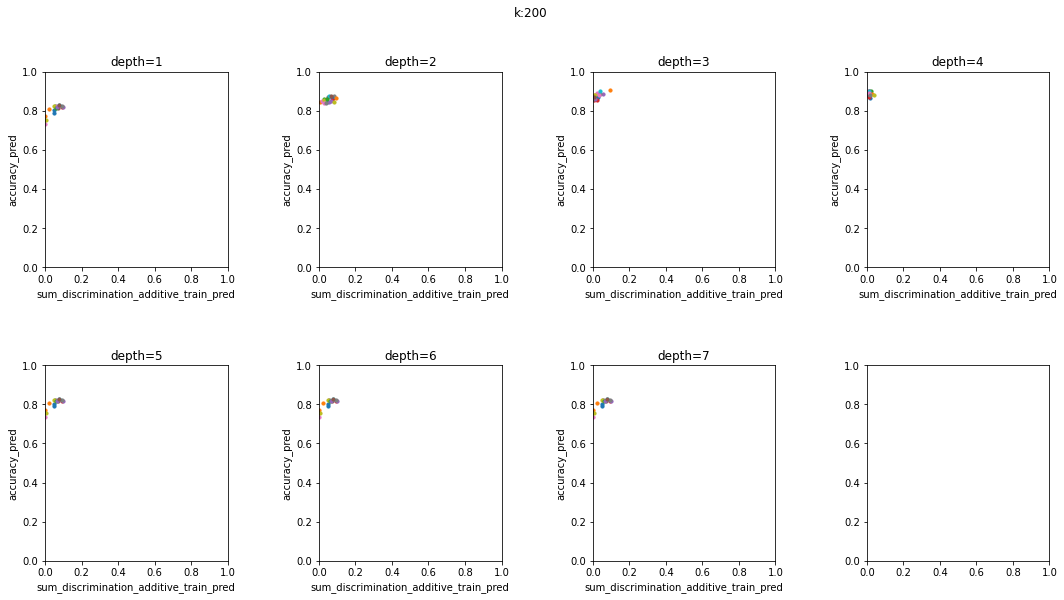

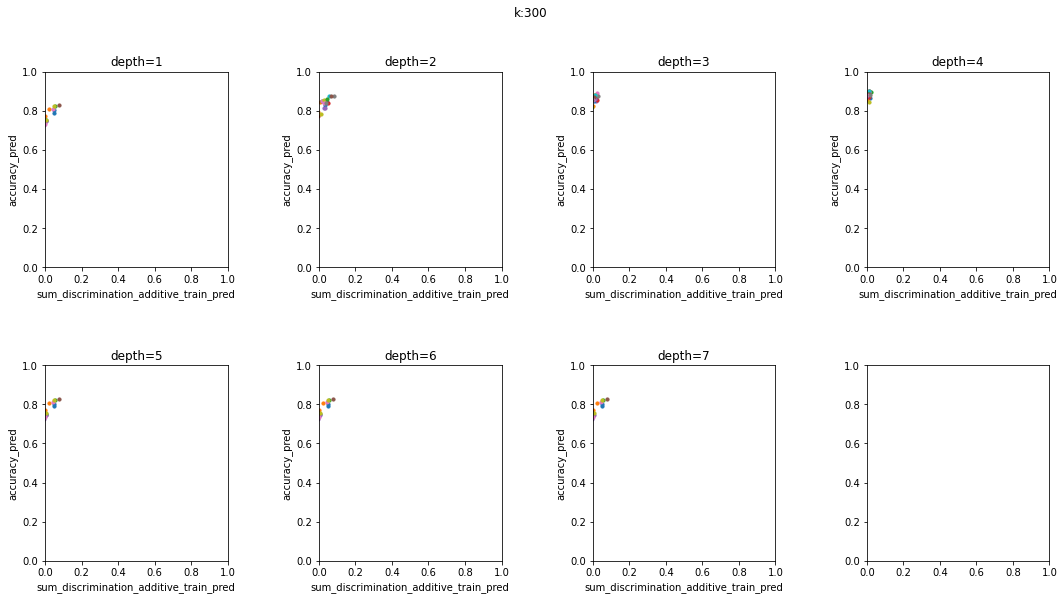

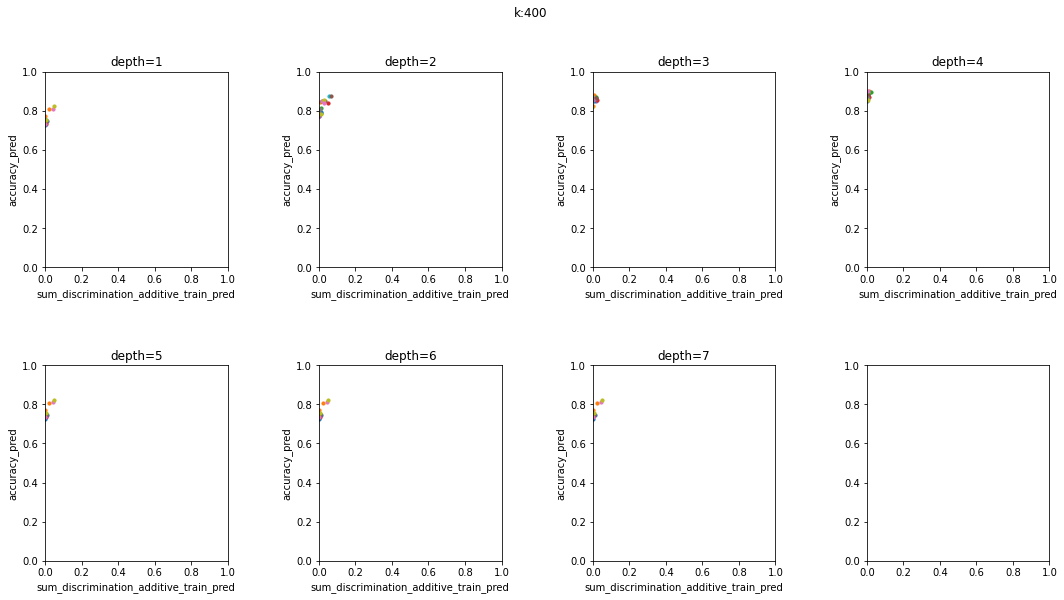

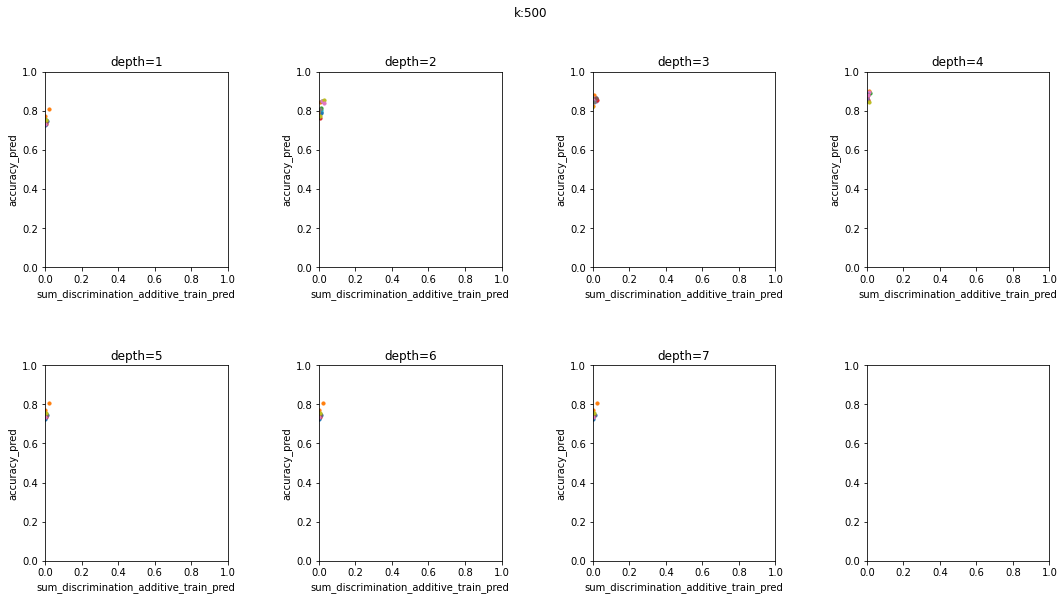

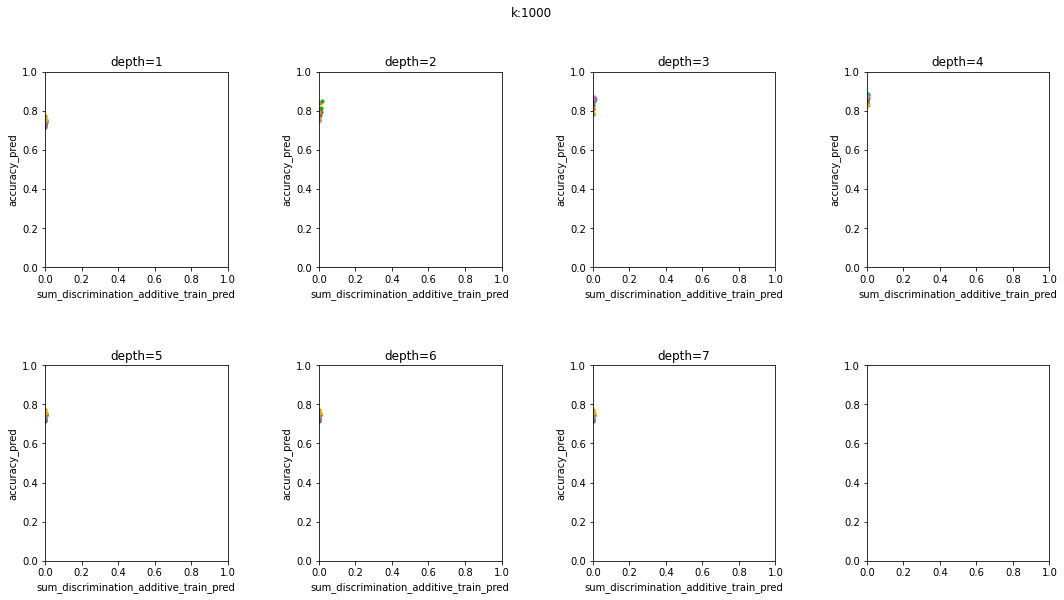

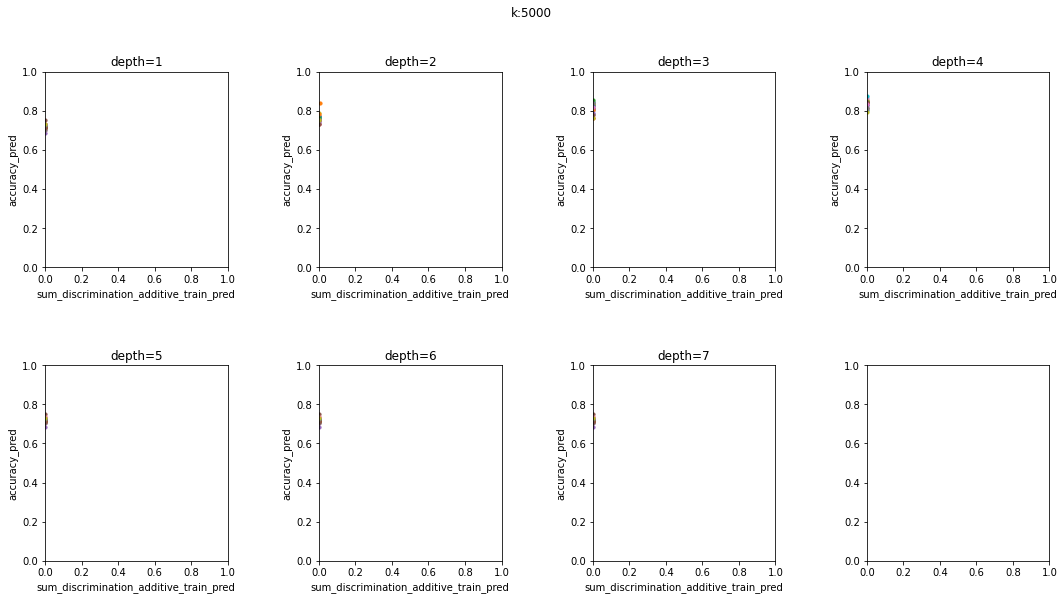

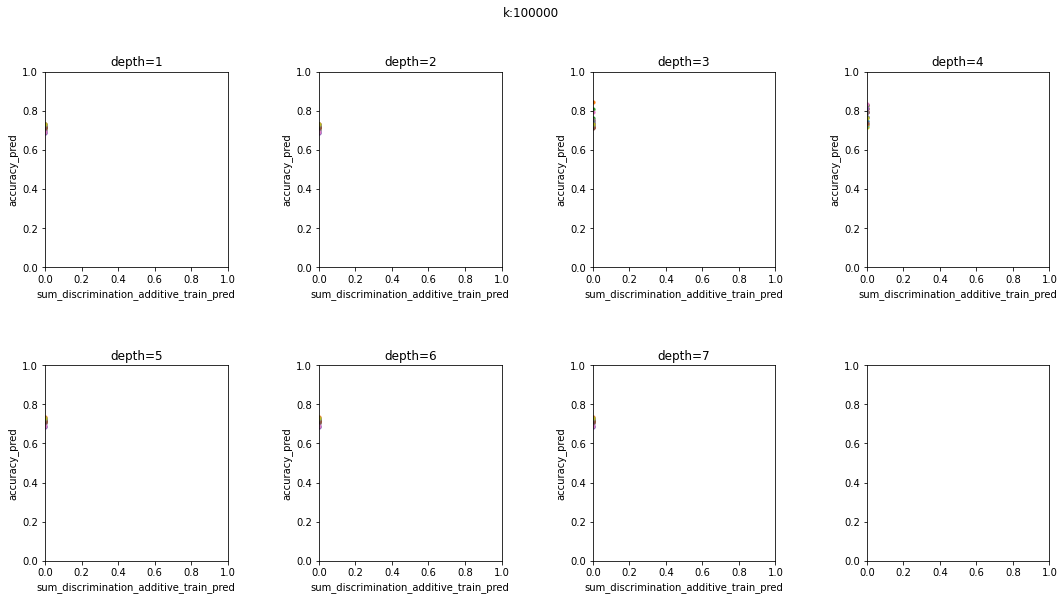

In [ ]:
utils.plot_one_scatter_by_depth("sum_discrimination_additive_train_pred", "accuracy_pred", result, (0, 1), (0, 1))

<Figure size 648x432 with 0 Axes>

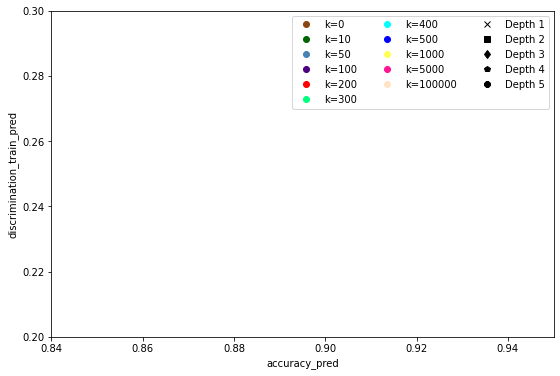

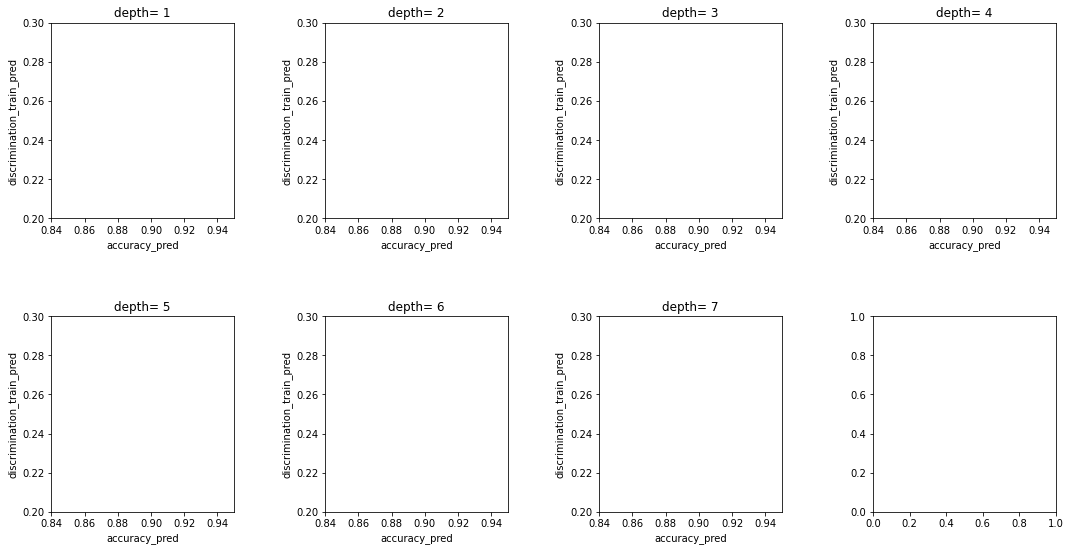

In [ ]:
x_lim = (0.84, 0.95)
y_lim = (0.2, 0.3)
utils.plot_k_depth_mean("accuracy_pred", "discrimination_train_pred", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("accuracy_pred", "discrimination_train_pred", result, x_lim, y_lim)

<Figure size 648x432 with 0 Axes>

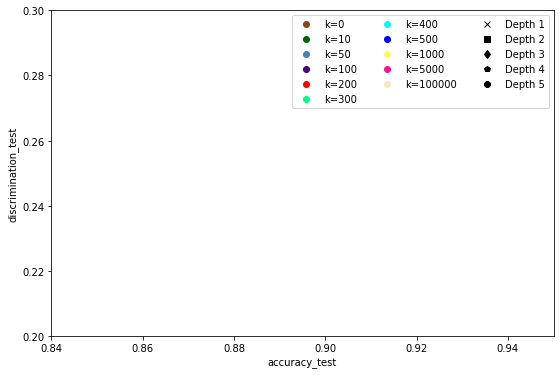

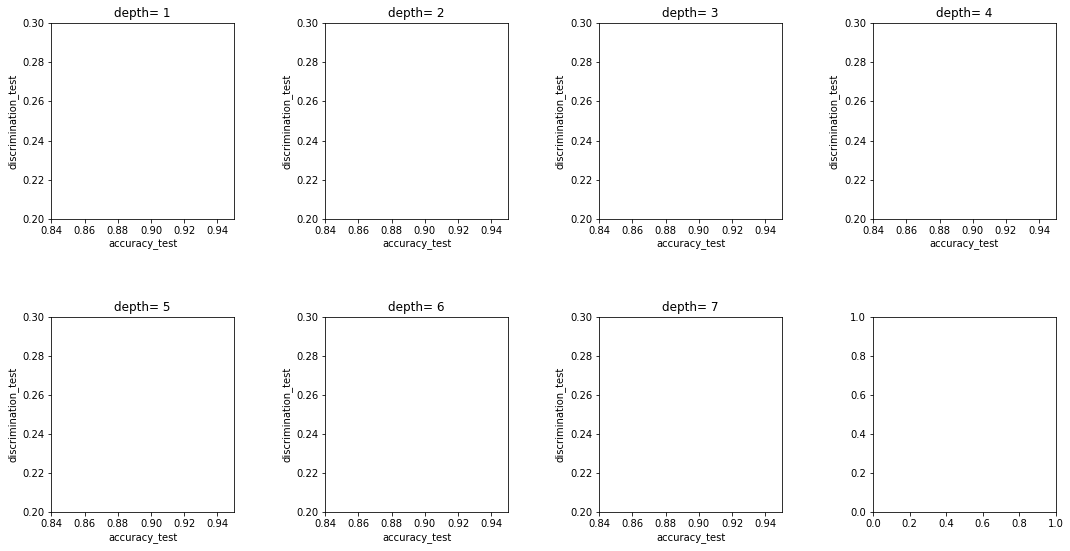

In [ ]:
x_lim = (0.84, 0.95)
y_lim = (0.2, 0.3)
utils.plot_k_depth_mean("accuracy_test", "discrimination_test", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("accuracy_test", "discrimination_test", result, x_lim, y_lim)

<Figure size 648x432 with 0 Axes>

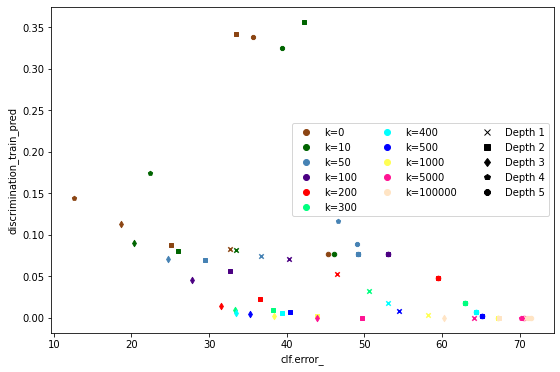

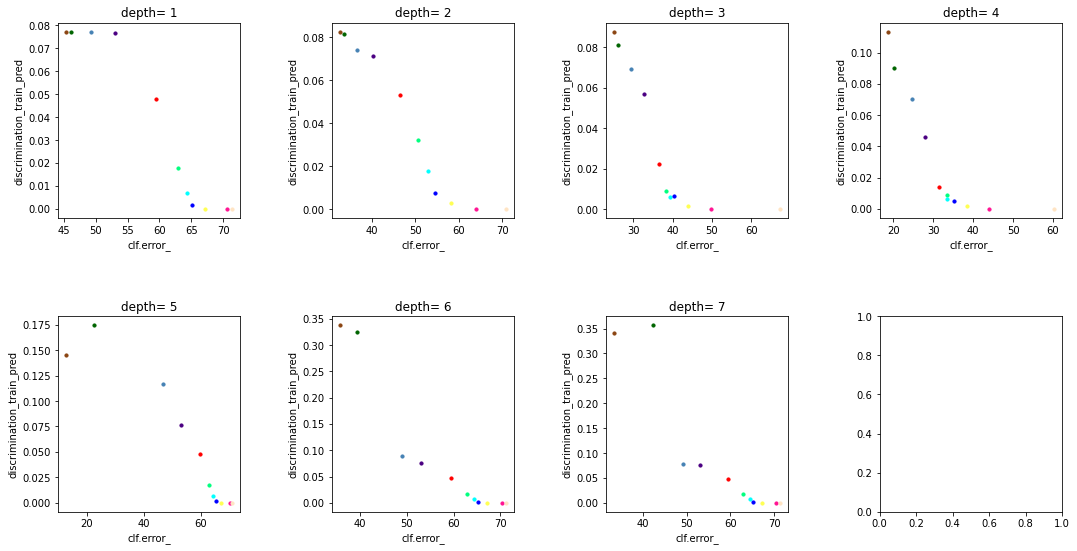

In [ ]:
x_lim = None
y_lim = None
utils.plot_k_depth_mean("clf.error_", "discrimination_train_pred", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("clf.error_", "discrimination_train_pred", result, x_lim, y_lim)

<Figure size 648x432 with 0 Axes>

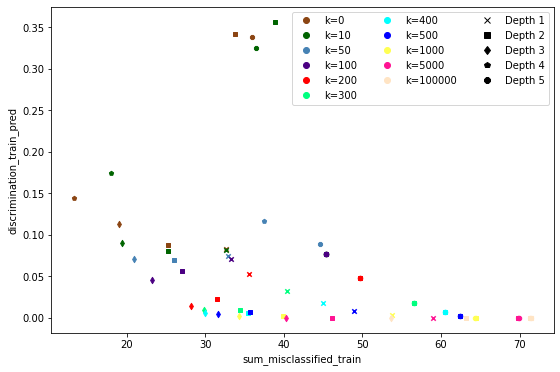

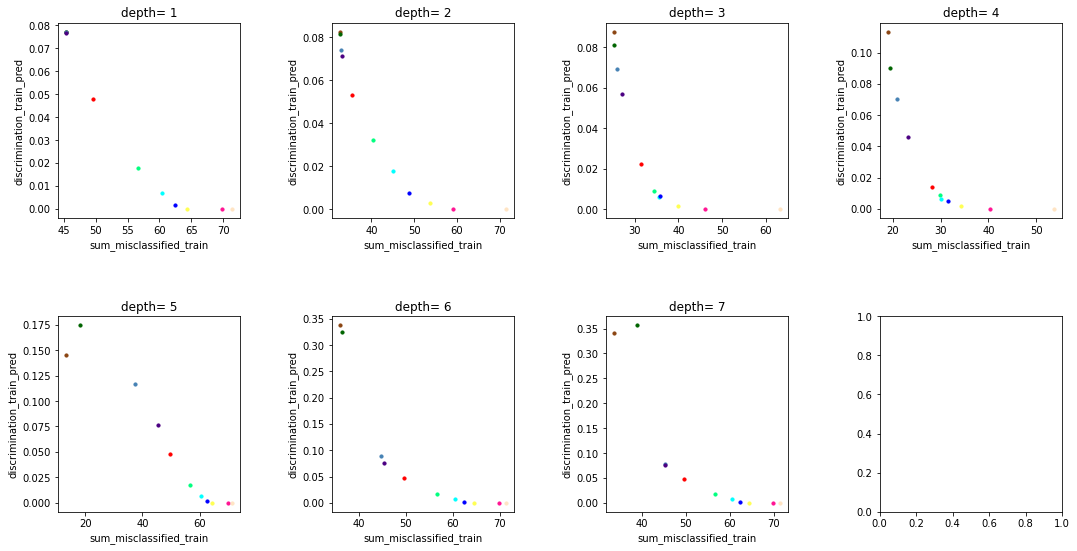

In [ ]:
x_lim = None
y_lim = None
utils.plot_k_depth_mean("sum_misclassified_train", "discrimination_train_pred", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("sum_misclassified_train", "discrimination_train_pred", result, x_lim, y_lim)

<Figure size 648x432 with 0 Axes>

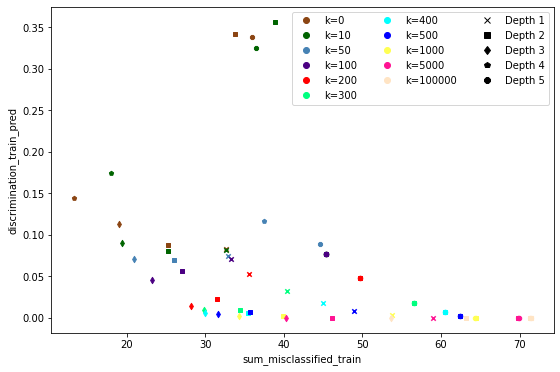

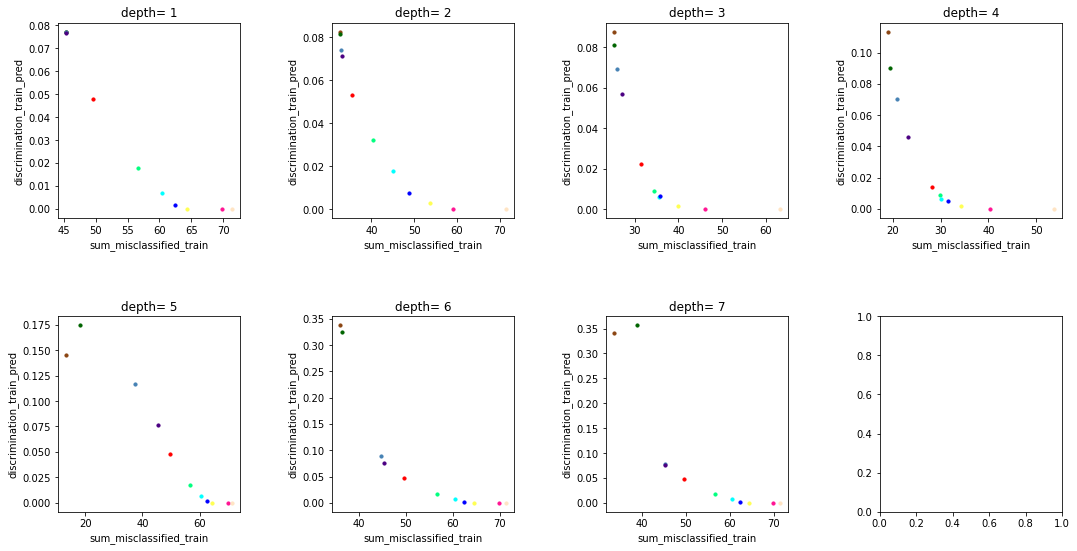

In [ ]:
x_lim = None
y_lim = None
utils.plot_k_depth_mean("sum_misclassified_train", "discrimination_train_pred", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("sum_misclassified_train", "discrimination_train_pred", result, x_lim, y_lim)

<Figure size 648x432 with 0 Axes>

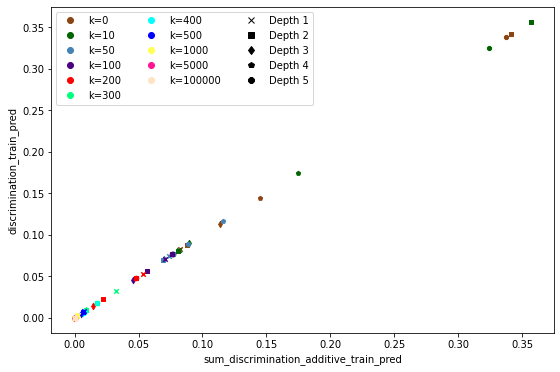

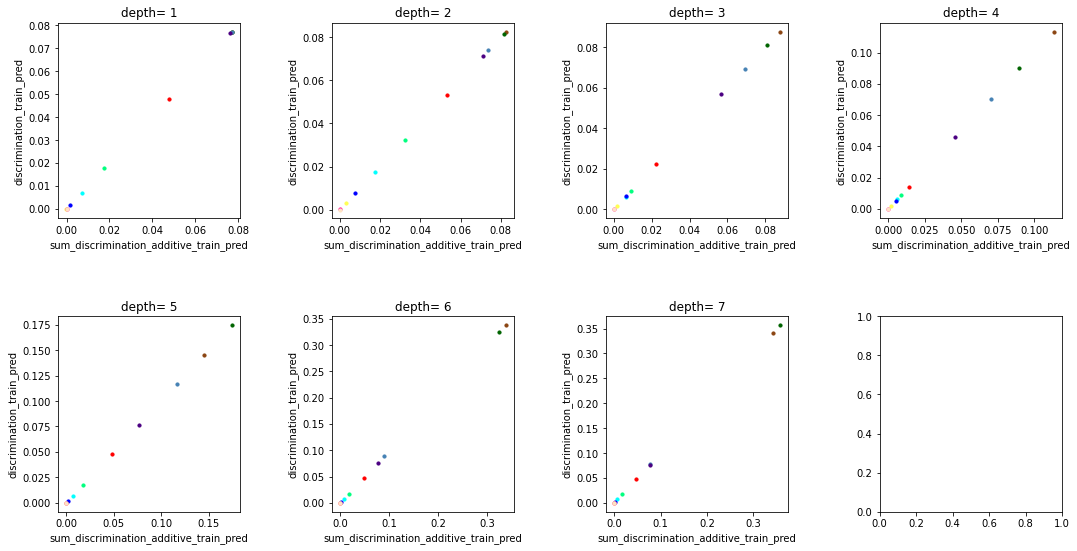

In [ ]:
x_lim = None
y_lim = None
utils.plot_k_depth_mean("sum_discrimination_additive_train_pred", "discrimination_train_pred", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("sum_discrimination_additive_train_pred", "discrimination_train_pred", result, x_lim, y_lim)

<Figure size 648x432 with 0 Axes>

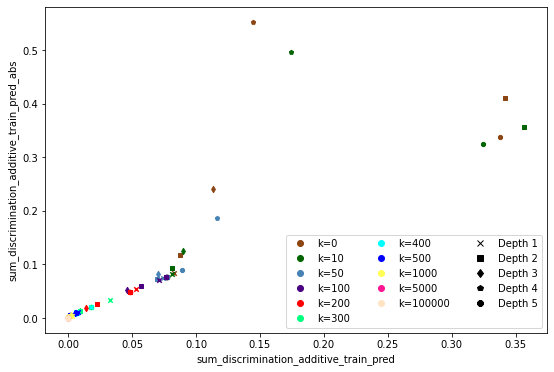

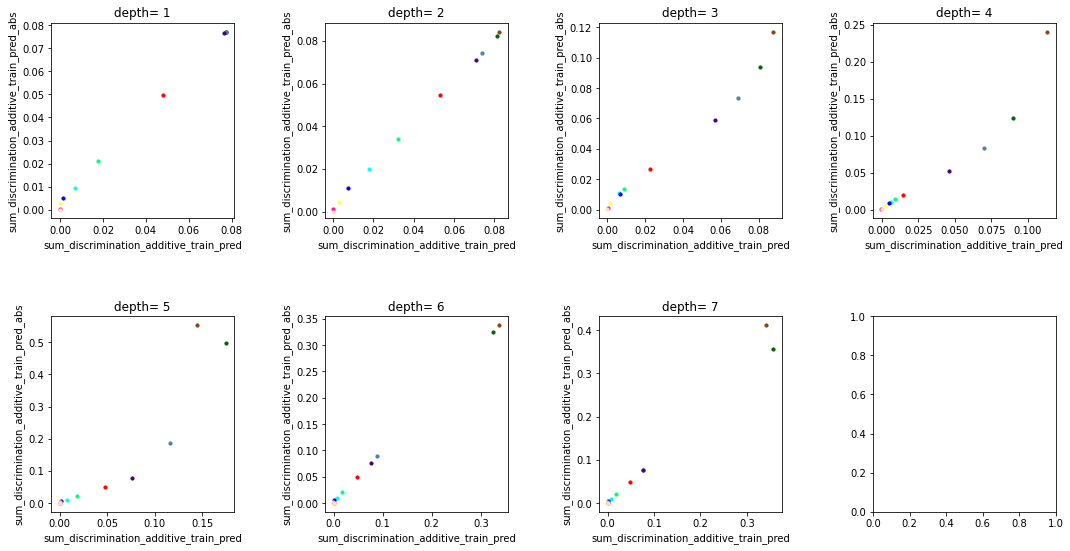

In [ ]:
x_lim = None
y_lim = None
utils.plot_k_depth_mean("sum_discrimination_additive_train_pred", "sum_discrimination_additive_train_pred_abs", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("sum_discrimination_additive_train_pred", "sum_discrimination_additive_train_pred_abs", result, x_lim, y_lim)